In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from itertools import product
from collections import defaultdict

In [7]:
from sklearn.metrics import roc_auc_score
import string

In [20]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [4]:
series = pd.read_csv('train.csv').drop(columns=['id'])

In [5]:
series.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [8]:
for c in string.ascii_uppercase[:-6]:    
    series[c+'_count'] = series['f_27'].str.count(c)

In [9]:
series.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,K_count,L_count,M_count,N_count,O_count,P_count,Q_count,R_count,S_count,T_count
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,0,0,0,0,0,0,0,0,0,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,0,0,0,0,0,0,0,0,0,0
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,1,0,0,0,0,0,0,0,0,0
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,0,0,0,0,0,0,0,0,0,0
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
for i in range(10):
    series['pos'+str(i)] = series['f_27'].str.get(i).apply(ord) - ord('A')

In [15]:
series['unique'] = series['f_27'].apply(lambda s:len(set(s)))

In [16]:
series.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,unique
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,1,0,1,3,0,3,1,0,1,3
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,2,0,2,2,0,3,2,4,1,5
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,0,0,4,0,1,2,10,0,3,6
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,3,1,1,0,0,2,1,2,1,4
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,3,1,2,1,1,2,7,5,4,6


I am suspious about the usefulness of these:

In [17]:
series['i_02_21'] = (series.f_21 + series.f_02 > 5.2).astype(int) - (series.f_21 + series.f_02 < -5.3).astype(int)
series['i_05_22'] = (series.f_22 + series.f_05 > 5.1).astype(int) - (series.f_22 + series.f_05 < -5.4).astype(int)
i_00_01_26 = series.f_00 + series.f_01 + series.f_26
series['i_00_01_26'] = (i_00_01_26 > 5.0).astype(int) - (i_00_01_26 < -5.0).astype(int)

In [18]:
series.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,pos4,pos5,pos6,pos7,pos8,pos9,unique,i_02_21,i_05_22,i_00_01_26
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,3,0,3,1,0,1,3,0,0,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,2,0,3,2,4,1,5,0,0,0
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,0,1,2,10,0,3,6,0,0,0
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,0,0,2,1,2,1,4,0,0,0
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,1,1,2,7,5,4,6,0,0,1


In [24]:
series['f_28'] = series['f_28']/100

In [25]:
def gridsearch_xgboost(params, X, y, obj="binary:logistic"):
    ''' the params include both the fit and the booster params '''
    
    param_names, param_vals = zip(*list(params.items()))
    id_booster, id_fit = [], []
    for idx, name in enumerate(param_names):
        if (name=='early_stopping_rounds'):
            id_fit.append(idx)
        else:
            id_booster.append(idx)
    
    best_test_score = 0.5
    for val_combination in product(*param_vals):
        param_fit, param_booster = {}, {}
        param_fit['eval_metric'] = 'auc'
        for idx in id_fit:
            param_fit[param_names[idx]] = val_combination[idx]
        for idx in id_booster:
            param_booster[param_names[idx]] = val_combination[idx]
        print(f"param_fit: {param_fit}")
        print(f"param_booster: {param_booster}")
        
        clf = XGBClassifier(**param_booster, objective=obj, use_label_encoder=False)
        result = defaultdict(list)
        for train_idx, test_idx in kf.split(X):
            X_train, y_train = X[train_idx], y[train_idx]
            X_test, y_test = X[test_idx], y[test_idx]
            param_fit['eval_set'] = [(X_test, y_test)]            
            clf.fit(X_train, y_train, **param_fit, verbose=True)
            if hasattr(clf, 'best_ntree_limit'):
                result['ntree'].append(clf.best_ntree_limit)
            else:
                result['ntree'].append(clf.n_estimators)            
            result['score'].append(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))
            print(f'stop at {result["ntree"][-1]}, score={result["score"][-1]}')

        mean_test_score = np.mean(result['score'])
        print(f"mean_test_score={mean_test_score}")
        if mean_test_score > best_test_score:
            best_test_score = mean_test_score
            best_param_booster = param_booster
            best_param_booster['n_estimators'] = np.int32(np.mean(result['ntree']))
    
    return best_param_booster

In [33]:
params = {'gamma': [0],
          'max_depth': [6,12],
          'min_child_weight': [0.0],
          'n_estimators': [50000],
          'early_stopping_rounds': [50],
          'learning_rate': [0.01,0.1,0.3]}

In [34]:
X, y = series.drop(columns=['target','f_27']).values, series['target'].values
best_param_booster = gridsearch_xgboost(params, X, y)

param_fit: {'eval_metric': 'auc', 'early_stopping_rounds': 50}
param_booster: {'gamma': 0, 'max_depth': 6, 'min_child_weight': 0.0, 'n_estimators': 50000, 'learning_rate': 0.01}
[0]	validation_0-auc:0.65967
[1]	validation_0-auc:0.65977
[2]	validation_0-auc:0.67462
[3]	validation_0-auc:0.67472
[4]	validation_0-auc:0.67503
[5]	validation_0-auc:0.67500
[6]	validation_0-auc:0.67492
[7]	validation_0-auc:0.67494
[8]	validation_0-auc:0.67437
[9]	validation_0-auc:0.67428
[10]	validation_0-auc:0.67434
[11]	validation_0-auc:0.67432
[12]	validation_0-auc:0.67432
[13]	validation_0-auc:0.67439
[14]	validation_0-auc:0.67446
[15]	validation_0-auc:0.67448
[16]	validation_0-auc:0.67451
[17]	validation_0-auc:0.67459
[18]	validation_0-auc:0.67457
[19]	validation_0-auc:0.68765
[20]	validation_0-auc:0.68770
[21]	validation_0-auc:0.68774
[22]	validation_0-auc:0.68778
[23]	validation_0-auc:0.68782
[24]	validation_0-auc:0.68781
[25]	validation_0-auc:0.68785
[26]	validation_0-auc:0.68827
[27]	validation_0-auc:

[263]	validation_0-auc:0.95272
[264]	validation_0-auc:0.95303
[265]	validation_0-auc:0.95302
[266]	validation_0-auc:0.95304
[267]	validation_0-auc:0.95352
[268]	validation_0-auc:0.95356
[269]	validation_0-auc:0.95355
[270]	validation_0-auc:0.95376
[271]	validation_0-auc:0.95377
[272]	validation_0-auc:0.95401
[273]	validation_0-auc:0.95425
[274]	validation_0-auc:0.95437
[275]	validation_0-auc:0.95431
[276]	validation_0-auc:0.95433
[277]	validation_0-auc:0.95494
[278]	validation_0-auc:0.95521
[279]	validation_0-auc:0.95533
[280]	validation_0-auc:0.95534
[281]	validation_0-auc:0.95549
[282]	validation_0-auc:0.95557
[283]	validation_0-auc:0.95575
[284]	validation_0-auc:0.95580
[285]	validation_0-auc:0.95575
[286]	validation_0-auc:0.95579
[287]	validation_0-auc:0.95595
[288]	validation_0-auc:0.95624
[289]	validation_0-auc:0.95646
[290]	validation_0-auc:0.95647
[291]	validation_0-auc:0.95648
[292]	validation_0-auc:0.95663
[293]	validation_0-auc:0.95681
[294]	validation_0-auc:0.95698
[295]	va

[528]	validation_0-auc:0.97213
[529]	validation_0-auc:0.97222
[530]	validation_0-auc:0.97222
[531]	validation_0-auc:0.97225
[532]	validation_0-auc:0.97240
[533]	validation_0-auc:0.97241
[534]	validation_0-auc:0.97247
[535]	validation_0-auc:0.97246
[536]	validation_0-auc:0.97255
[537]	validation_0-auc:0.97258
[538]	validation_0-auc:0.97258
[539]	validation_0-auc:0.97259
[540]	validation_0-auc:0.97262
[541]	validation_0-auc:0.97271
[542]	validation_0-auc:0.97273
[543]	validation_0-auc:0.97276
[544]	validation_0-auc:0.97276
[545]	validation_0-auc:0.97285
[546]	validation_0-auc:0.97291
[547]	validation_0-auc:0.97292
[548]	validation_0-auc:0.97299
[549]	validation_0-auc:0.97300
[550]	validation_0-auc:0.97301
[551]	validation_0-auc:0.97302
[552]	validation_0-auc:0.97309
[553]	validation_0-auc:0.97313
[554]	validation_0-auc:0.97317
[555]	validation_0-auc:0.97316
[556]	validation_0-auc:0.97325
[557]	validation_0-auc:0.97327
[558]	validation_0-auc:0.97334
[559]	validation_0-auc:0.97335
[560]	va

[793]	validation_0-auc:0.97833
[794]	validation_0-auc:0.97837
[795]	validation_0-auc:0.97837
[796]	validation_0-auc:0.97838
[797]	validation_0-auc:0.97840
[798]	validation_0-auc:0.97845
[799]	validation_0-auc:0.97846
[800]	validation_0-auc:0.97847
[801]	validation_0-auc:0.97848
[802]	validation_0-auc:0.97848
[803]	validation_0-auc:0.97849
[804]	validation_0-auc:0.97851
[805]	validation_0-auc:0.97854
[806]	validation_0-auc:0.97854
[807]	validation_0-auc:0.97855
[808]	validation_0-auc:0.97858
[809]	validation_0-auc:0.97859
[810]	validation_0-auc:0.97860
[811]	validation_0-auc:0.97860
[812]	validation_0-auc:0.97860
[813]	validation_0-auc:0.97862
[814]	validation_0-auc:0.97862
[815]	validation_0-auc:0.97864
[816]	validation_0-auc:0.97869
[817]	validation_0-auc:0.97868
[818]	validation_0-auc:0.97870
[819]	validation_0-auc:0.97870
[820]	validation_0-auc:0.97871
[821]	validation_0-auc:0.97873
[822]	validation_0-auc:0.97874
[823]	validation_0-auc:0.97874
[824]	validation_0-auc:0.97876
[825]	va

[1056]	validation_0-auc:0.98174
[1057]	validation_0-auc:0.98174
[1058]	validation_0-auc:0.98175
[1059]	validation_0-auc:0.98179
[1060]	validation_0-auc:0.98181
[1061]	validation_0-auc:0.98181
[1062]	validation_0-auc:0.98181
[1063]	validation_0-auc:0.98183
[1064]	validation_0-auc:0.98184
[1065]	validation_0-auc:0.98184
[1066]	validation_0-auc:0.98185
[1067]	validation_0-auc:0.98186
[1068]	validation_0-auc:0.98187
[1069]	validation_0-auc:0.98187
[1070]	validation_0-auc:0.98188
[1071]	validation_0-auc:0.98190
[1072]	validation_0-auc:0.98190
[1073]	validation_0-auc:0.98191
[1074]	validation_0-auc:0.98192
[1075]	validation_0-auc:0.98193
[1076]	validation_0-auc:0.98194
[1077]	validation_0-auc:0.98194
[1078]	validation_0-auc:0.98196
[1079]	validation_0-auc:0.98198
[1080]	validation_0-auc:0.98198
[1081]	validation_0-auc:0.98201
[1082]	validation_0-auc:0.98201
[1083]	validation_0-auc:0.98203
[1084]	validation_0-auc:0.98203
[1085]	validation_0-auc:0.98204
[1086]	validation_0-auc:0.98205
[1087]	v

[1313]	validation_0-auc:0.98407
[1314]	validation_0-auc:0.98407
[1315]	validation_0-auc:0.98408
[1316]	validation_0-auc:0.98408
[1317]	validation_0-auc:0.98408
[1318]	validation_0-auc:0.98408
[1319]	validation_0-auc:0.98411
[1320]	validation_0-auc:0.98412
[1321]	validation_0-auc:0.98412
[1322]	validation_0-auc:0.98413
[1323]	validation_0-auc:0.98413
[1324]	validation_0-auc:0.98415
[1325]	validation_0-auc:0.98415
[1326]	validation_0-auc:0.98415
[1327]	validation_0-auc:0.98415
[1328]	validation_0-auc:0.98418
[1329]	validation_0-auc:0.98418
[1330]	validation_0-auc:0.98418
[1331]	validation_0-auc:0.98418
[1332]	validation_0-auc:0.98419
[1333]	validation_0-auc:0.98420
[1334]	validation_0-auc:0.98421
[1335]	validation_0-auc:0.98422
[1336]	validation_0-auc:0.98422
[1337]	validation_0-auc:0.98423
[1338]	validation_0-auc:0.98423
[1339]	validation_0-auc:0.98423
[1340]	validation_0-auc:0.98423
[1341]	validation_0-auc:0.98427
[1342]	validation_0-auc:0.98427
[1343]	validation_0-auc:0.98430
[1344]	v

[1570]	validation_0-auc:0.98592
[1571]	validation_0-auc:0.98595
[1572]	validation_0-auc:0.98595
[1573]	validation_0-auc:0.98595
[1574]	validation_0-auc:0.98595
[1575]	validation_0-auc:0.98596
[1576]	validation_0-auc:0.98596
[1577]	validation_0-auc:0.98596
[1578]	validation_0-auc:0.98596
[1579]	validation_0-auc:0.98599
[1580]	validation_0-auc:0.98598
[1581]	validation_0-auc:0.98600
[1582]	validation_0-auc:0.98600
[1583]	validation_0-auc:0.98600
[1584]	validation_0-auc:0.98603
[1585]	validation_0-auc:0.98603
[1586]	validation_0-auc:0.98603
[1587]	validation_0-auc:0.98604
[1588]	validation_0-auc:0.98605
[1589]	validation_0-auc:0.98606
[1590]	validation_0-auc:0.98606
[1591]	validation_0-auc:0.98606
[1592]	validation_0-auc:0.98606
[1593]	validation_0-auc:0.98607
[1594]	validation_0-auc:0.98607
[1595]	validation_0-auc:0.98607
[1596]	validation_0-auc:0.98607
[1597]	validation_0-auc:0.98607
[1598]	validation_0-auc:0.98608
[1599]	validation_0-auc:0.98610
[1600]	validation_0-auc:0.98610
[1601]	v

[1827]	validation_0-auc:0.98728
[1828]	validation_0-auc:0.98728
[1829]	validation_0-auc:0.98728
[1830]	validation_0-auc:0.98728
[1831]	validation_0-auc:0.98728
[1832]	validation_0-auc:0.98729
[1833]	validation_0-auc:0.98729
[1834]	validation_0-auc:0.98730
[1835]	validation_0-auc:0.98730
[1836]	validation_0-auc:0.98731
[1837]	validation_0-auc:0.98731
[1838]	validation_0-auc:0.98731
[1839]	validation_0-auc:0.98731
[1840]	validation_0-auc:0.98732
[1841]	validation_0-auc:0.98732
[1842]	validation_0-auc:0.98732
[1843]	validation_0-auc:0.98732
[1844]	validation_0-auc:0.98734
[1845]	validation_0-auc:0.98735
[1846]	validation_0-auc:0.98735
[1847]	validation_0-auc:0.98735
[1848]	validation_0-auc:0.98735
[1849]	validation_0-auc:0.98735
[1850]	validation_0-auc:0.98736
[1851]	validation_0-auc:0.98736
[1852]	validation_0-auc:0.98736
[1853]	validation_0-auc:0.98736
[1854]	validation_0-auc:0.98737
[1855]	validation_0-auc:0.98738
[1856]	validation_0-auc:0.98738
[1857]	validation_0-auc:0.98738
[1858]	v

[2084]	validation_0-auc:0.98812
[2085]	validation_0-auc:0.98812
[2086]	validation_0-auc:0.98812
[2087]	validation_0-auc:0.98813
[2088]	validation_0-auc:0.98813
[2089]	validation_0-auc:0.98813
[2090]	validation_0-auc:0.98813
[2091]	validation_0-auc:0.98814
[2092]	validation_0-auc:0.98816
[2093]	validation_0-auc:0.98816
[2094]	validation_0-auc:0.98816
[2095]	validation_0-auc:0.98816
[2096]	validation_0-auc:0.98816
[2097]	validation_0-auc:0.98816
[2098]	validation_0-auc:0.98817
[2099]	validation_0-auc:0.98817
[2100]	validation_0-auc:0.98817
[2101]	validation_0-auc:0.98817
[2102]	validation_0-auc:0.98818
[2103]	validation_0-auc:0.98818
[2104]	validation_0-auc:0.98818
[2105]	validation_0-auc:0.98818
[2106]	validation_0-auc:0.98818
[2107]	validation_0-auc:0.98818
[2108]	validation_0-auc:0.98818
[2109]	validation_0-auc:0.98818
[2110]	validation_0-auc:0.98818
[2111]	validation_0-auc:0.98818
[2112]	validation_0-auc:0.98819
[2113]	validation_0-auc:0.98819
[2114]	validation_0-auc:0.98819
[2115]	v

[2341]	validation_0-auc:0.98881
[2342]	validation_0-auc:0.98882
[2343]	validation_0-auc:0.98882
[2344]	validation_0-auc:0.98883
[2345]	validation_0-auc:0.98883
[2346]	validation_0-auc:0.98882
[2347]	validation_0-auc:0.98882
[2348]	validation_0-auc:0.98883
[2349]	validation_0-auc:0.98883
[2350]	validation_0-auc:0.98884
[2351]	validation_0-auc:0.98883
[2352]	validation_0-auc:0.98885
[2353]	validation_0-auc:0.98885
[2354]	validation_0-auc:0.98885
[2355]	validation_0-auc:0.98885
[2356]	validation_0-auc:0.98885
[2357]	validation_0-auc:0.98885
[2358]	validation_0-auc:0.98886
[2359]	validation_0-auc:0.98887
[2360]	validation_0-auc:0.98888
[2361]	validation_0-auc:0.98888
[2362]	validation_0-auc:0.98888
[2363]	validation_0-auc:0.98888
[2364]	validation_0-auc:0.98888
[2365]	validation_0-auc:0.98889
[2366]	validation_0-auc:0.98889
[2367]	validation_0-auc:0.98889
[2368]	validation_0-auc:0.98889
[2369]	validation_0-auc:0.98891
[2370]	validation_0-auc:0.98891
[2371]	validation_0-auc:0.98891
[2372]	v

[2598]	validation_0-auc:0.98942
[2599]	validation_0-auc:0.98942
[2600]	validation_0-auc:0.98942
[2601]	validation_0-auc:0.98942
[2602]	validation_0-auc:0.98943
[2603]	validation_0-auc:0.98943
[2604]	validation_0-auc:0.98943
[2605]	validation_0-auc:0.98943
[2606]	validation_0-auc:0.98943
[2607]	validation_0-auc:0.98943
[2608]	validation_0-auc:0.98943
[2609]	validation_0-auc:0.98943
[2610]	validation_0-auc:0.98945
[2611]	validation_0-auc:0.98945
[2612]	validation_0-auc:0.98945
[2613]	validation_0-auc:0.98945
[2614]	validation_0-auc:0.98945
[2615]	validation_0-auc:0.98945
[2616]	validation_0-auc:0.98945
[2617]	validation_0-auc:0.98945
[2618]	validation_0-auc:0.98945
[2619]	validation_0-auc:0.98945
[2620]	validation_0-auc:0.98945
[2621]	validation_0-auc:0.98946
[2622]	validation_0-auc:0.98946
[2623]	validation_0-auc:0.98946
[2624]	validation_0-auc:0.98946
[2625]	validation_0-auc:0.98947
[2626]	validation_0-auc:0.98947
[2627]	validation_0-auc:0.98947
[2628]	validation_0-auc:0.98947
[2629]	v

[2855]	validation_0-auc:0.98995
[2856]	validation_0-auc:0.98995
[2857]	validation_0-auc:0.98995
[2858]	validation_0-auc:0.98996
[2859]	validation_0-auc:0.98996
[2860]	validation_0-auc:0.98996
[2861]	validation_0-auc:0.98996
[2862]	validation_0-auc:0.98996
[2863]	validation_0-auc:0.98997
[2864]	validation_0-auc:0.98998
[2865]	validation_0-auc:0.98998
[2866]	validation_0-auc:0.98998
[2867]	validation_0-auc:0.98998
[2868]	validation_0-auc:0.98998
[2869]	validation_0-auc:0.98998
[2870]	validation_0-auc:0.98998
[2871]	validation_0-auc:0.98998
[2872]	validation_0-auc:0.98998
[2873]	validation_0-auc:0.98998
[2874]	validation_0-auc:0.98999
[2875]	validation_0-auc:0.98999
[2876]	validation_0-auc:0.98999
[2877]	validation_0-auc:0.98999
[2878]	validation_0-auc:0.99000
[2879]	validation_0-auc:0.99000
[2880]	validation_0-auc:0.99000
[2881]	validation_0-auc:0.99000
[2882]	validation_0-auc:0.99001
[2883]	validation_0-auc:0.99001
[2884]	validation_0-auc:0.99001
[2885]	validation_0-auc:0.99001
[2886]	v

[3112]	validation_0-auc:0.99040
[3113]	validation_0-auc:0.99040
[3114]	validation_0-auc:0.99040
[3115]	validation_0-auc:0.99040
[3116]	validation_0-auc:0.99040
[3117]	validation_0-auc:0.99040
[3118]	validation_0-auc:0.99042
[3119]	validation_0-auc:0.99042
[3120]	validation_0-auc:0.99042
[3121]	validation_0-auc:0.99042
[3122]	validation_0-auc:0.99042
[3123]	validation_0-auc:0.99042
[3124]	validation_0-auc:0.99042
[3125]	validation_0-auc:0.99042
[3126]	validation_0-auc:0.99042
[3127]	validation_0-auc:0.99044
[3128]	validation_0-auc:0.99044
[3129]	validation_0-auc:0.99044
[3130]	validation_0-auc:0.99044
[3131]	validation_0-auc:0.99044
[3132]	validation_0-auc:0.99044
[3133]	validation_0-auc:0.99044
[3134]	validation_0-auc:0.99044
[3135]	validation_0-auc:0.99044
[3136]	validation_0-auc:0.99044
[3137]	validation_0-auc:0.99044
[3138]	validation_0-auc:0.99044
[3139]	validation_0-auc:0.99044
[3140]	validation_0-auc:0.99044
[3141]	validation_0-auc:0.99044
[3142]	validation_0-auc:0.99044
[3143]	v

[3369]	validation_0-auc:0.99081
[3370]	validation_0-auc:0.99081
[3371]	validation_0-auc:0.99081
[3372]	validation_0-auc:0.99081
[3373]	validation_0-auc:0.99081
[3374]	validation_0-auc:0.99081
[3375]	validation_0-auc:0.99081
[3376]	validation_0-auc:0.99081
[3377]	validation_0-auc:0.99081
[3378]	validation_0-auc:0.99082
[3379]	validation_0-auc:0.99082
[3380]	validation_0-auc:0.99082
[3381]	validation_0-auc:0.99082
[3382]	validation_0-auc:0.99082
[3383]	validation_0-auc:0.99082
[3384]	validation_0-auc:0.99082
[3385]	validation_0-auc:0.99082
[3386]	validation_0-auc:0.99082
[3387]	validation_0-auc:0.99082
[3388]	validation_0-auc:0.99083
[3389]	validation_0-auc:0.99083
[3390]	validation_0-auc:0.99083
[3391]	validation_0-auc:0.99083
[3392]	validation_0-auc:0.99083
[3393]	validation_0-auc:0.99083
[3394]	validation_0-auc:0.99083
[3395]	validation_0-auc:0.99083
[3396]	validation_0-auc:0.99084
[3397]	validation_0-auc:0.99084
[3398]	validation_0-auc:0.99084
[3399]	validation_0-auc:0.99084
[3400]	v

[3626]	validation_0-auc:0.99113
[3627]	validation_0-auc:0.99113
[3628]	validation_0-auc:0.99115
[3629]	validation_0-auc:0.99115
[3630]	validation_0-auc:0.99115
[3631]	validation_0-auc:0.99115
[3632]	validation_0-auc:0.99115
[3633]	validation_0-auc:0.99115
[3634]	validation_0-auc:0.99115
[3635]	validation_0-auc:0.99115
[3636]	validation_0-auc:0.99115
[3637]	validation_0-auc:0.99116
[3638]	validation_0-auc:0.99116
[3639]	validation_0-auc:0.99116
[3640]	validation_0-auc:0.99116
[3641]	validation_0-auc:0.99116
[3642]	validation_0-auc:0.99116
[3643]	validation_0-auc:0.99116
[3644]	validation_0-auc:0.99116
[3645]	validation_0-auc:0.99116
[3646]	validation_0-auc:0.99116
[3647]	validation_0-auc:0.99116
[3648]	validation_0-auc:0.99117
[3649]	validation_0-auc:0.99117
[3650]	validation_0-auc:0.99117
[3651]	validation_0-auc:0.99117
[3652]	validation_0-auc:0.99117
[3653]	validation_0-auc:0.99117
[3654]	validation_0-auc:0.99118
[3655]	validation_0-auc:0.99118
[3656]	validation_0-auc:0.99118
[3657]	v

[3883]	validation_0-auc:0.99151
[3884]	validation_0-auc:0.99151
[3885]	validation_0-auc:0.99151
[3886]	validation_0-auc:0.99151
[3887]	validation_0-auc:0.99151
[3888]	validation_0-auc:0.99152
[3889]	validation_0-auc:0.99152
[3890]	validation_0-auc:0.99152
[3891]	validation_0-auc:0.99152
[3892]	validation_0-auc:0.99152
[3893]	validation_0-auc:0.99152
[3894]	validation_0-auc:0.99152
[3895]	validation_0-auc:0.99152
[3896]	validation_0-auc:0.99152
[3897]	validation_0-auc:0.99153
[3898]	validation_0-auc:0.99153
[3899]	validation_0-auc:0.99153
[3900]	validation_0-auc:0.99153
[3901]	validation_0-auc:0.99153
[3902]	validation_0-auc:0.99153
[3903]	validation_0-auc:0.99153
[3904]	validation_0-auc:0.99153
[3905]	validation_0-auc:0.99153
[3906]	validation_0-auc:0.99153
[3907]	validation_0-auc:0.99154
[3908]	validation_0-auc:0.99154
[3909]	validation_0-auc:0.99154
[3910]	validation_0-auc:0.99155
[3911]	validation_0-auc:0.99155
[3912]	validation_0-auc:0.99155
[3913]	validation_0-auc:0.99155
[3914]	v

[4140]	validation_0-auc:0.99185
[4141]	validation_0-auc:0.99185
[4142]	validation_0-auc:0.99185
[4143]	validation_0-auc:0.99186
[4144]	validation_0-auc:0.99186
[4145]	validation_0-auc:0.99186
[4146]	validation_0-auc:0.99186
[4147]	validation_0-auc:0.99186
[4148]	validation_0-auc:0.99186
[4149]	validation_0-auc:0.99186
[4150]	validation_0-auc:0.99186
[4151]	validation_0-auc:0.99186
[4152]	validation_0-auc:0.99186
[4153]	validation_0-auc:0.99186
[4154]	validation_0-auc:0.99186
[4155]	validation_0-auc:0.99187
[4156]	validation_0-auc:0.99187
[4157]	validation_0-auc:0.99187
[4158]	validation_0-auc:0.99187
[4159]	validation_0-auc:0.99187
[4160]	validation_0-auc:0.99188
[4161]	validation_0-auc:0.99188
[4162]	validation_0-auc:0.99188
[4163]	validation_0-auc:0.99188
[4164]	validation_0-auc:0.99188
[4165]	validation_0-auc:0.99188
[4166]	validation_0-auc:0.99188
[4167]	validation_0-auc:0.99188
[4168]	validation_0-auc:0.99188
[4169]	validation_0-auc:0.99188
[4170]	validation_0-auc:0.99188
[4171]	v

[4397]	validation_0-auc:0.99210
[4398]	validation_0-auc:0.99210
[4399]	validation_0-auc:0.99210
[4400]	validation_0-auc:0.99210
[4401]	validation_0-auc:0.99211
[4402]	validation_0-auc:0.99211
[4403]	validation_0-auc:0.99211
[4404]	validation_0-auc:0.99211
[4405]	validation_0-auc:0.99211
[4406]	validation_0-auc:0.99211
[4407]	validation_0-auc:0.99211
[4408]	validation_0-auc:0.99211
[4409]	validation_0-auc:0.99211
[4410]	validation_0-auc:0.99212
[4411]	validation_0-auc:0.99212
[4412]	validation_0-auc:0.99212
[4413]	validation_0-auc:0.99212
[4414]	validation_0-auc:0.99212
[4415]	validation_0-auc:0.99212
[4416]	validation_0-auc:0.99212
[4417]	validation_0-auc:0.99212
[4418]	validation_0-auc:0.99213
[4419]	validation_0-auc:0.99212
[4420]	validation_0-auc:0.99212
[4421]	validation_0-auc:0.99212
[4422]	validation_0-auc:0.99212
[4423]	validation_0-auc:0.99213
[4424]	validation_0-auc:0.99213
[4425]	validation_0-auc:0.99213
[4426]	validation_0-auc:0.99213
[4427]	validation_0-auc:0.99213
[4428]	v

[4654]	validation_0-auc:0.99239
[4655]	validation_0-auc:0.99239
[4656]	validation_0-auc:0.99239
[4657]	validation_0-auc:0.99240
[4658]	validation_0-auc:0.99240
[4659]	validation_0-auc:0.99240
[4660]	validation_0-auc:0.99240
[4661]	validation_0-auc:0.99240
[4662]	validation_0-auc:0.99241
[4663]	validation_0-auc:0.99241
[4664]	validation_0-auc:0.99241
[4665]	validation_0-auc:0.99241
[4666]	validation_0-auc:0.99242
[4667]	validation_0-auc:0.99242
[4668]	validation_0-auc:0.99242
[4669]	validation_0-auc:0.99243
[4670]	validation_0-auc:0.99243
[4671]	validation_0-auc:0.99243
[4672]	validation_0-auc:0.99243
[4673]	validation_0-auc:0.99243
[4674]	validation_0-auc:0.99243
[4675]	validation_0-auc:0.99243
[4676]	validation_0-auc:0.99243
[4677]	validation_0-auc:0.99243
[4678]	validation_0-auc:0.99243
[4679]	validation_0-auc:0.99243
[4680]	validation_0-auc:0.99243
[4681]	validation_0-auc:0.99243
[4682]	validation_0-auc:0.99243
[4683]	validation_0-auc:0.99244
[4684]	validation_0-auc:0.99244
[4685]	v

[4911]	validation_0-auc:0.99275
[4912]	validation_0-auc:0.99276
[4913]	validation_0-auc:0.99276
[4914]	validation_0-auc:0.99276
[4915]	validation_0-auc:0.99276
[4916]	validation_0-auc:0.99276
[4917]	validation_0-auc:0.99276
[4918]	validation_0-auc:0.99276
[4919]	validation_0-auc:0.99276
[4920]	validation_0-auc:0.99276
[4921]	validation_0-auc:0.99276
[4922]	validation_0-auc:0.99276
[4923]	validation_0-auc:0.99277
[4924]	validation_0-auc:0.99277
[4925]	validation_0-auc:0.99277
[4926]	validation_0-auc:0.99277
[4927]	validation_0-auc:0.99278
[4928]	validation_0-auc:0.99278
[4929]	validation_0-auc:0.99278
[4930]	validation_0-auc:0.99279
[4931]	validation_0-auc:0.99279
[4932]	validation_0-auc:0.99279
[4933]	validation_0-auc:0.99279
[4934]	validation_0-auc:0.99279
[4935]	validation_0-auc:0.99279
[4936]	validation_0-auc:0.99280
[4937]	validation_0-auc:0.99280
[4938]	validation_0-auc:0.99280
[4939]	validation_0-auc:0.99280
[4940]	validation_0-auc:0.99280
[4941]	validation_0-auc:0.99280
[4942]	v

[5168]	validation_0-auc:0.99333
[5169]	validation_0-auc:0.99333
[5170]	validation_0-auc:0.99333
[5171]	validation_0-auc:0.99333
[5172]	validation_0-auc:0.99333
[5173]	validation_0-auc:0.99333
[5174]	validation_0-auc:0.99333
[5175]	validation_0-auc:0.99333
[5176]	validation_0-auc:0.99333
[5177]	validation_0-auc:0.99333
[5178]	validation_0-auc:0.99333
[5179]	validation_0-auc:0.99333
[5180]	validation_0-auc:0.99333
[5181]	validation_0-auc:0.99333
[5182]	validation_0-auc:0.99334
[5183]	validation_0-auc:0.99334
[5184]	validation_0-auc:0.99334
[5185]	validation_0-auc:0.99334
[5186]	validation_0-auc:0.99334
[5187]	validation_0-auc:0.99334
[5188]	validation_0-auc:0.99334
[5189]	validation_0-auc:0.99334
[5190]	validation_0-auc:0.99334
[5191]	validation_0-auc:0.99334
[5192]	validation_0-auc:0.99335
[5193]	validation_0-auc:0.99335
[5194]	validation_0-auc:0.99336
[5195]	validation_0-auc:0.99335
[5196]	validation_0-auc:0.99335
[5197]	validation_0-auc:0.99335
[5198]	validation_0-auc:0.99335
[5199]	v

[5425]	validation_0-auc:0.99347
[5426]	validation_0-auc:0.99347
[5427]	validation_0-auc:0.99347
[5428]	validation_0-auc:0.99347
[5429]	validation_0-auc:0.99347
[5430]	validation_0-auc:0.99347
[5431]	validation_0-auc:0.99348
[5432]	validation_0-auc:0.99348
[5433]	validation_0-auc:0.99348
[5434]	validation_0-auc:0.99348
[5435]	validation_0-auc:0.99348
[5436]	validation_0-auc:0.99348
[5437]	validation_0-auc:0.99348
[5438]	validation_0-auc:0.99348
[5439]	validation_0-auc:0.99348
[5440]	validation_0-auc:0.99348
[5441]	validation_0-auc:0.99348
[5442]	validation_0-auc:0.99348
[5443]	validation_0-auc:0.99348
[5444]	validation_0-auc:0.99349
[5445]	validation_0-auc:0.99349
[5446]	validation_0-auc:0.99349
[5447]	validation_0-auc:0.99349
[5448]	validation_0-auc:0.99349
[5449]	validation_0-auc:0.99349
[5450]	validation_0-auc:0.99349
[5451]	validation_0-auc:0.99349
[5452]	validation_0-auc:0.99349
[5453]	validation_0-auc:0.99349
[5454]	validation_0-auc:0.99349
[5455]	validation_0-auc:0.99349
[5456]	v

[5682]	validation_0-auc:0.99370
[5683]	validation_0-auc:0.99370
[5684]	validation_0-auc:0.99370
[5685]	validation_0-auc:0.99370
[5686]	validation_0-auc:0.99370
[5687]	validation_0-auc:0.99370
[5688]	validation_0-auc:0.99370
[5689]	validation_0-auc:0.99370
[5690]	validation_0-auc:0.99370
[5691]	validation_0-auc:0.99370
[5692]	validation_0-auc:0.99370
[5693]	validation_0-auc:0.99370
[5694]	validation_0-auc:0.99370
[5695]	validation_0-auc:0.99370
[5696]	validation_0-auc:0.99370
[5697]	validation_0-auc:0.99370
[5698]	validation_0-auc:0.99370
[5699]	validation_0-auc:0.99371
[5700]	validation_0-auc:0.99371
[5701]	validation_0-auc:0.99371
[5702]	validation_0-auc:0.99371
[5703]	validation_0-auc:0.99371
[5704]	validation_0-auc:0.99371
[5705]	validation_0-auc:0.99371
[5706]	validation_0-auc:0.99371
[5707]	validation_0-auc:0.99371
[5708]	validation_0-auc:0.99371
[5709]	validation_0-auc:0.99372
[5710]	validation_0-auc:0.99372
[5711]	validation_0-auc:0.99372
[5712]	validation_0-auc:0.99372
[5713]	v

[5939]	validation_0-auc:0.99386
[5940]	validation_0-auc:0.99386
[5941]	validation_0-auc:0.99386
[5942]	validation_0-auc:0.99386
[5943]	validation_0-auc:0.99386
[5944]	validation_0-auc:0.99387
[5945]	validation_0-auc:0.99387
[5946]	validation_0-auc:0.99388
[5947]	validation_0-auc:0.99388
[5948]	validation_0-auc:0.99388
[5949]	validation_0-auc:0.99388
[5950]	validation_0-auc:0.99388
[5951]	validation_0-auc:0.99388
[5952]	validation_0-auc:0.99388
[5953]	validation_0-auc:0.99388
[5954]	validation_0-auc:0.99388
[5955]	validation_0-auc:0.99388
[5956]	validation_0-auc:0.99388
[5957]	validation_0-auc:0.99388
[5958]	validation_0-auc:0.99388
[5959]	validation_0-auc:0.99388
[5960]	validation_0-auc:0.99388
[5961]	validation_0-auc:0.99388
[5962]	validation_0-auc:0.99388
[5963]	validation_0-auc:0.99388
[5964]	validation_0-auc:0.99388
[5965]	validation_0-auc:0.99388
[5966]	validation_0-auc:0.99388
[5967]	validation_0-auc:0.99388
[5968]	validation_0-auc:0.99388
[5969]	validation_0-auc:0.99388
[5970]	v

[6196]	validation_0-auc:0.99412
[6197]	validation_0-auc:0.99411
[6198]	validation_0-auc:0.99412
[6199]	validation_0-auc:0.99412
[6200]	validation_0-auc:0.99412
[6201]	validation_0-auc:0.99412
[6202]	validation_0-auc:0.99412
[6203]	validation_0-auc:0.99412
[6204]	validation_0-auc:0.99412
[6205]	validation_0-auc:0.99412
[6206]	validation_0-auc:0.99412
[6207]	validation_0-auc:0.99412
[6208]	validation_0-auc:0.99413
[6209]	validation_0-auc:0.99413
[6210]	validation_0-auc:0.99413
[6211]	validation_0-auc:0.99413
[6212]	validation_0-auc:0.99413
[6213]	validation_0-auc:0.99413
[6214]	validation_0-auc:0.99413
[6215]	validation_0-auc:0.99414
[6216]	validation_0-auc:0.99414
[6217]	validation_0-auc:0.99414
[6218]	validation_0-auc:0.99414
[6219]	validation_0-auc:0.99415
[6220]	validation_0-auc:0.99415
[6221]	validation_0-auc:0.99416
[6222]	validation_0-auc:0.99416
[6223]	validation_0-auc:0.99416
[6224]	validation_0-auc:0.99416
[6225]	validation_0-auc:0.99416
[6226]	validation_0-auc:0.99417
[6227]	v

[6453]	validation_0-auc:0.99433
[6454]	validation_0-auc:0.99433
[6455]	validation_0-auc:0.99433
[6456]	validation_0-auc:0.99433
[6457]	validation_0-auc:0.99433
[6458]	validation_0-auc:0.99433
[6459]	validation_0-auc:0.99433
[6460]	validation_0-auc:0.99433
[6461]	validation_0-auc:0.99433
[6462]	validation_0-auc:0.99434
[6463]	validation_0-auc:0.99434
[6464]	validation_0-auc:0.99434
[6465]	validation_0-auc:0.99434
[6466]	validation_0-auc:0.99434
[6467]	validation_0-auc:0.99434
[6468]	validation_0-auc:0.99434
[6469]	validation_0-auc:0.99434
[6470]	validation_0-auc:0.99434
[6471]	validation_0-auc:0.99434
[6472]	validation_0-auc:0.99434
[6473]	validation_0-auc:0.99434
[6474]	validation_0-auc:0.99434
[6475]	validation_0-auc:0.99434
[6476]	validation_0-auc:0.99434
[6477]	validation_0-auc:0.99434
[6478]	validation_0-auc:0.99434
[6479]	validation_0-auc:0.99434
[6480]	validation_0-auc:0.99434
[6481]	validation_0-auc:0.99434
[6482]	validation_0-auc:0.99434
[6483]	validation_0-auc:0.99434
[6484]	v

[6710]	validation_0-auc:0.99442
[6711]	validation_0-auc:0.99442
[6712]	validation_0-auc:0.99442
[6713]	validation_0-auc:0.99442
[6714]	validation_0-auc:0.99442
[6715]	validation_0-auc:0.99442
[6716]	validation_0-auc:0.99442
[6717]	validation_0-auc:0.99442
[6718]	validation_0-auc:0.99442
[6719]	validation_0-auc:0.99442
[6720]	validation_0-auc:0.99442
[6721]	validation_0-auc:0.99442
[6722]	validation_0-auc:0.99442
[6723]	validation_0-auc:0.99443
[6724]	validation_0-auc:0.99443
[6725]	validation_0-auc:0.99443
[6726]	validation_0-auc:0.99443
[6727]	validation_0-auc:0.99443
[6728]	validation_0-auc:0.99443
[6729]	validation_0-auc:0.99444
[6730]	validation_0-auc:0.99444
[6731]	validation_0-auc:0.99444
[6732]	validation_0-auc:0.99444
[6733]	validation_0-auc:0.99444
[6734]	validation_0-auc:0.99444
[6735]	validation_0-auc:0.99444
[6736]	validation_0-auc:0.99444
[6737]	validation_0-auc:0.99444
[6738]	validation_0-auc:0.99444
[6739]	validation_0-auc:0.99445
[6740]	validation_0-auc:0.99445
[6741]	v

[6967]	validation_0-auc:0.99454
[6968]	validation_0-auc:0.99455
[6969]	validation_0-auc:0.99455
[6970]	validation_0-auc:0.99455
[6971]	validation_0-auc:0.99455
[6972]	validation_0-auc:0.99455
[6973]	validation_0-auc:0.99455
[6974]	validation_0-auc:0.99455
[6975]	validation_0-auc:0.99455
[6976]	validation_0-auc:0.99455
[6977]	validation_0-auc:0.99455
[6978]	validation_0-auc:0.99455
[6979]	validation_0-auc:0.99455
[6980]	validation_0-auc:0.99455
[6981]	validation_0-auc:0.99455
[6982]	validation_0-auc:0.99455
[6983]	validation_0-auc:0.99455
[6984]	validation_0-auc:0.99455
[6985]	validation_0-auc:0.99455
[6986]	validation_0-auc:0.99455
[6987]	validation_0-auc:0.99455
[6988]	validation_0-auc:0.99455
[6989]	validation_0-auc:0.99455
[6990]	validation_0-auc:0.99455
[6991]	validation_0-auc:0.99455
[6992]	validation_0-auc:0.99455
[6993]	validation_0-auc:0.99455
[6994]	validation_0-auc:0.99455
[6995]	validation_0-auc:0.99455
[6996]	validation_0-auc:0.99455
[6997]	validation_0-auc:0.99455
[6998]	v

[7224]	validation_0-auc:0.99469
[7225]	validation_0-auc:0.99469
[7226]	validation_0-auc:0.99469
[7227]	validation_0-auc:0.99469
[7228]	validation_0-auc:0.99469
[7229]	validation_0-auc:0.99469
[7230]	validation_0-auc:0.99469
[7231]	validation_0-auc:0.99469
[7232]	validation_0-auc:0.99469
[7233]	validation_0-auc:0.99469
[7234]	validation_0-auc:0.99470
[7235]	validation_0-auc:0.99470
[7236]	validation_0-auc:0.99470
[7237]	validation_0-auc:0.99470
[7238]	validation_0-auc:0.99470
[7239]	validation_0-auc:0.99470
[7240]	validation_0-auc:0.99470
[7241]	validation_0-auc:0.99470
[7242]	validation_0-auc:0.99470
[7243]	validation_0-auc:0.99470
[7244]	validation_0-auc:0.99470
[7245]	validation_0-auc:0.99470
[7246]	validation_0-auc:0.99470
[7247]	validation_0-auc:0.99470
[7248]	validation_0-auc:0.99470
[7249]	validation_0-auc:0.99470
[7250]	validation_0-auc:0.99470
[7251]	validation_0-auc:0.99470
[7252]	validation_0-auc:0.99470
[7253]	validation_0-auc:0.99470
[7254]	validation_0-auc:0.99470
[7255]	v

[7481]	validation_0-auc:0.99480
[7482]	validation_0-auc:0.99480
[7483]	validation_0-auc:0.99480
[7484]	validation_0-auc:0.99480
[7485]	validation_0-auc:0.99480
[7486]	validation_0-auc:0.99480
[7487]	validation_0-auc:0.99480
[7488]	validation_0-auc:0.99480
[7489]	validation_0-auc:0.99480
[7490]	validation_0-auc:0.99480
[7491]	validation_0-auc:0.99480
[7492]	validation_0-auc:0.99480
[7493]	validation_0-auc:0.99480
[7494]	validation_0-auc:0.99480
[7495]	validation_0-auc:0.99481
[7496]	validation_0-auc:0.99481
[7497]	validation_0-auc:0.99481
[7498]	validation_0-auc:0.99481
[7499]	validation_0-auc:0.99480
[7500]	validation_0-auc:0.99480
[7501]	validation_0-auc:0.99480
[7502]	validation_0-auc:0.99481
[7503]	validation_0-auc:0.99481
[7504]	validation_0-auc:0.99481
[7505]	validation_0-auc:0.99481
[7506]	validation_0-auc:0.99481
[7507]	validation_0-auc:0.99481
[7508]	validation_0-auc:0.99481
[7509]	validation_0-auc:0.99481
[7510]	validation_0-auc:0.99481
[7511]	validation_0-auc:0.99481
[7512]	v

[7738]	validation_0-auc:0.99489
[7739]	validation_0-auc:0.99489
[7740]	validation_0-auc:0.99489
[7741]	validation_0-auc:0.99489
[7742]	validation_0-auc:0.99490
[7743]	validation_0-auc:0.99490
[7744]	validation_0-auc:0.99490
[7745]	validation_0-auc:0.99490
[7746]	validation_0-auc:0.99490
[7747]	validation_0-auc:0.99490
[7748]	validation_0-auc:0.99490
[7749]	validation_0-auc:0.99490
[7750]	validation_0-auc:0.99490
[7751]	validation_0-auc:0.99490
[7752]	validation_0-auc:0.99490
[7753]	validation_0-auc:0.99490
[7754]	validation_0-auc:0.99490
[7755]	validation_0-auc:0.99490
[7756]	validation_0-auc:0.99490
[7757]	validation_0-auc:0.99490
[7758]	validation_0-auc:0.99490
[7759]	validation_0-auc:0.99490
[7760]	validation_0-auc:0.99490
[7761]	validation_0-auc:0.99490
[7762]	validation_0-auc:0.99490
[7763]	validation_0-auc:0.99490
[7764]	validation_0-auc:0.99490
[7765]	validation_0-auc:0.99490
[7766]	validation_0-auc:0.99490
[7767]	validation_0-auc:0.99490
[7768]	validation_0-auc:0.99490
[7769]	v

[7995]	validation_0-auc:0.99502
[7996]	validation_0-auc:0.99502
[7997]	validation_0-auc:0.99502
[7998]	validation_0-auc:0.99502
[7999]	validation_0-auc:0.99502
[8000]	validation_0-auc:0.99502
[8001]	validation_0-auc:0.99502
[8002]	validation_0-auc:0.99502
[8003]	validation_0-auc:0.99502
[8004]	validation_0-auc:0.99503
[8005]	validation_0-auc:0.99503
[8006]	validation_0-auc:0.99503
[8007]	validation_0-auc:0.99503
[8008]	validation_0-auc:0.99503
[8009]	validation_0-auc:0.99503
[8010]	validation_0-auc:0.99503
[8011]	validation_0-auc:0.99503
[8012]	validation_0-auc:0.99503
[8013]	validation_0-auc:0.99503
[8014]	validation_0-auc:0.99503
[8015]	validation_0-auc:0.99503
[8016]	validation_0-auc:0.99503
[8017]	validation_0-auc:0.99503
[8018]	validation_0-auc:0.99503
[8019]	validation_0-auc:0.99503
[8020]	validation_0-auc:0.99503
[8021]	validation_0-auc:0.99503
[8022]	validation_0-auc:0.99503
[8023]	validation_0-auc:0.99503
[8024]	validation_0-auc:0.99503
[8025]	validation_0-auc:0.99503
[8026]	v

[8252]	validation_0-auc:0.99512
[8253]	validation_0-auc:0.99512
[8254]	validation_0-auc:0.99512
[8255]	validation_0-auc:0.99512
[8256]	validation_0-auc:0.99512
[8257]	validation_0-auc:0.99512
[8258]	validation_0-auc:0.99512
[8259]	validation_0-auc:0.99512
[8260]	validation_0-auc:0.99512
[8261]	validation_0-auc:0.99512
[8262]	validation_0-auc:0.99512
[8263]	validation_0-auc:0.99512
[8264]	validation_0-auc:0.99512
[8265]	validation_0-auc:0.99512
[8266]	validation_0-auc:0.99512
[8267]	validation_0-auc:0.99512
[8268]	validation_0-auc:0.99512
[8269]	validation_0-auc:0.99512
[8270]	validation_0-auc:0.99512
[8271]	validation_0-auc:0.99512
[8272]	validation_0-auc:0.99512
[8273]	validation_0-auc:0.99512
[8274]	validation_0-auc:0.99512
[8275]	validation_0-auc:0.99512
[8276]	validation_0-auc:0.99512
[8277]	validation_0-auc:0.99512
[8278]	validation_0-auc:0.99512
[8279]	validation_0-auc:0.99512
[8280]	validation_0-auc:0.99512
[8281]	validation_0-auc:0.99512
[8282]	validation_0-auc:0.99512
[8283]	v

[8509]	validation_0-auc:0.99517
[8510]	validation_0-auc:0.99517
[8511]	validation_0-auc:0.99517
[8512]	validation_0-auc:0.99517
[8513]	validation_0-auc:0.99517
[8514]	validation_0-auc:0.99517
[8515]	validation_0-auc:0.99517
[8516]	validation_0-auc:0.99517
[8517]	validation_0-auc:0.99517
[8518]	validation_0-auc:0.99517
[8519]	validation_0-auc:0.99517
[8520]	validation_0-auc:0.99517
[8521]	validation_0-auc:0.99517
[8522]	validation_0-auc:0.99517
[8523]	validation_0-auc:0.99517
[8524]	validation_0-auc:0.99517
[8525]	validation_0-auc:0.99517
[8526]	validation_0-auc:0.99517
[8527]	validation_0-auc:0.99517
[8528]	validation_0-auc:0.99517
[8529]	validation_0-auc:0.99517
[8530]	validation_0-auc:0.99517
[8531]	validation_0-auc:0.99517
[8532]	validation_0-auc:0.99517
[8533]	validation_0-auc:0.99518
[8534]	validation_0-auc:0.99518
[8535]	validation_0-auc:0.99518
[8536]	validation_0-auc:0.99518
[8537]	validation_0-auc:0.99517
[8538]	validation_0-auc:0.99517
[8539]	validation_0-auc:0.99518
[8540]	v

[8766]	validation_0-auc:0.99524
[8767]	validation_0-auc:0.99524
[8768]	validation_0-auc:0.99524
[8769]	validation_0-auc:0.99524
[8770]	validation_0-auc:0.99524
[8771]	validation_0-auc:0.99524
[8772]	validation_0-auc:0.99524
[8773]	validation_0-auc:0.99524
[8774]	validation_0-auc:0.99524
[8775]	validation_0-auc:0.99524
[8776]	validation_0-auc:0.99524
[8777]	validation_0-auc:0.99524
[8778]	validation_0-auc:0.99524
[8779]	validation_0-auc:0.99524
[8780]	validation_0-auc:0.99524
[8781]	validation_0-auc:0.99524
[8782]	validation_0-auc:0.99524
[8783]	validation_0-auc:0.99524
[8784]	validation_0-auc:0.99524
[8785]	validation_0-auc:0.99524
[8786]	validation_0-auc:0.99524
[8787]	validation_0-auc:0.99524
[8788]	validation_0-auc:0.99524
[8789]	validation_0-auc:0.99524
[8790]	validation_0-auc:0.99524
[8791]	validation_0-auc:0.99524
[8792]	validation_0-auc:0.99524
[8793]	validation_0-auc:0.99524
[8794]	validation_0-auc:0.99524
[8795]	validation_0-auc:0.99524
[8796]	validation_0-auc:0.99524
[8797]	v

[9023]	validation_0-auc:0.99536
[9024]	validation_0-auc:0.99536
[9025]	validation_0-auc:0.99536
[9026]	validation_0-auc:0.99536
[9027]	validation_0-auc:0.99536
[9028]	validation_0-auc:0.99536
[9029]	validation_0-auc:0.99536
[9030]	validation_0-auc:0.99537
[9031]	validation_0-auc:0.99537
[9032]	validation_0-auc:0.99537
[9033]	validation_0-auc:0.99537
[9034]	validation_0-auc:0.99537
[9035]	validation_0-auc:0.99537
[9036]	validation_0-auc:0.99537
[9037]	validation_0-auc:0.99537
[9038]	validation_0-auc:0.99537
[9039]	validation_0-auc:0.99537
[9040]	validation_0-auc:0.99537
[9041]	validation_0-auc:0.99537
[9042]	validation_0-auc:0.99537
[9043]	validation_0-auc:0.99538
[9044]	validation_0-auc:0.99537
[9045]	validation_0-auc:0.99538
[9046]	validation_0-auc:0.99538
[9047]	validation_0-auc:0.99538
[9048]	validation_0-auc:0.99538
[9049]	validation_0-auc:0.99538
[9050]	validation_0-auc:0.99538
[9051]	validation_0-auc:0.99538
[9052]	validation_0-auc:0.99539
[9053]	validation_0-auc:0.99538
[9054]	v

[9280]	validation_0-auc:0.99544
[9281]	validation_0-auc:0.99544
[9282]	validation_0-auc:0.99544
[9283]	validation_0-auc:0.99544
[9284]	validation_0-auc:0.99544
[9285]	validation_0-auc:0.99545
[9286]	validation_0-auc:0.99545
[9287]	validation_0-auc:0.99545
[9288]	validation_0-auc:0.99545
[9289]	validation_0-auc:0.99545
[9290]	validation_0-auc:0.99545
[9291]	validation_0-auc:0.99545
[9292]	validation_0-auc:0.99545
[9293]	validation_0-auc:0.99545
[9294]	validation_0-auc:0.99545
[9295]	validation_0-auc:0.99545
[9296]	validation_0-auc:0.99545
[9297]	validation_0-auc:0.99545
[9298]	validation_0-auc:0.99545
[9299]	validation_0-auc:0.99545
[9300]	validation_0-auc:0.99545
[9301]	validation_0-auc:0.99545
[9302]	validation_0-auc:0.99545
[9303]	validation_0-auc:0.99545
[9304]	validation_0-auc:0.99545
[9305]	validation_0-auc:0.99545
[9306]	validation_0-auc:0.99545
[9307]	validation_0-auc:0.99545
[9308]	validation_0-auc:0.99545
[9309]	validation_0-auc:0.99545
[9310]	validation_0-auc:0.99545
[9311]	v

[9537]	validation_0-auc:0.99553
[9538]	validation_0-auc:0.99553
[9539]	validation_0-auc:0.99553
[9540]	validation_0-auc:0.99553
[9541]	validation_0-auc:0.99553
[9542]	validation_0-auc:0.99553
[9543]	validation_0-auc:0.99553
[9544]	validation_0-auc:0.99553
[9545]	validation_0-auc:0.99553
[9546]	validation_0-auc:0.99553
[9547]	validation_0-auc:0.99553
[9548]	validation_0-auc:0.99553
[9549]	validation_0-auc:0.99553
[9550]	validation_0-auc:0.99553
[9551]	validation_0-auc:0.99553
[9552]	validation_0-auc:0.99553
[9553]	validation_0-auc:0.99553
[9554]	validation_0-auc:0.99554
[9555]	validation_0-auc:0.99554
[9556]	validation_0-auc:0.99554
[9557]	validation_0-auc:0.99554
[9558]	validation_0-auc:0.99554
[9559]	validation_0-auc:0.99554
[9560]	validation_0-auc:0.99554
[9561]	validation_0-auc:0.99554
[9562]	validation_0-auc:0.99554
[9563]	validation_0-auc:0.99554
[9564]	validation_0-auc:0.99554
[9565]	validation_0-auc:0.99554
[9566]	validation_0-auc:0.99554
[9567]	validation_0-auc:0.99554
[9568]	v

[9794]	validation_0-auc:0.99559
[9795]	validation_0-auc:0.99559
[9796]	validation_0-auc:0.99559
[9797]	validation_0-auc:0.99559
[9798]	validation_0-auc:0.99559
[9799]	validation_0-auc:0.99559
[9800]	validation_0-auc:0.99559
[9801]	validation_0-auc:0.99559
[9802]	validation_0-auc:0.99559
[9803]	validation_0-auc:0.99559
[9804]	validation_0-auc:0.99559
[9805]	validation_0-auc:0.99559
[9806]	validation_0-auc:0.99559
[9807]	validation_0-auc:0.99559
[9808]	validation_0-auc:0.99559
[9809]	validation_0-auc:0.99559
[9810]	validation_0-auc:0.99559
[9811]	validation_0-auc:0.99559
[9812]	validation_0-auc:0.99559
[9813]	validation_0-auc:0.99559
[9814]	validation_0-auc:0.99559
[9815]	validation_0-auc:0.99559
[9816]	validation_0-auc:0.99559
[9817]	validation_0-auc:0.99559
[9818]	validation_0-auc:0.99559
[9819]	validation_0-auc:0.99559
[9820]	validation_0-auc:0.99559
[9821]	validation_0-auc:0.99559
[9822]	validation_0-auc:0.99559
[9823]	validation_0-auc:0.99559
[9824]	validation_0-auc:0.99559
[9825]	v

[179]	validation_0-auc:0.93555
[180]	validation_0-auc:0.93581
[181]	validation_0-auc:0.93595
[182]	validation_0-auc:0.93600
[183]	validation_0-auc:0.93609
[184]	validation_0-auc:0.93625
[185]	validation_0-auc:0.93693
[186]	validation_0-auc:0.93704
[187]	validation_0-auc:0.93758
[188]	validation_0-auc:0.93768
[189]	validation_0-auc:0.93827
[190]	validation_0-auc:0.93854
[191]	validation_0-auc:0.93869
[192]	validation_0-auc:0.93880
[193]	validation_0-auc:0.93891
[194]	validation_0-auc:0.93887
[195]	validation_0-auc:0.93962
[196]	validation_0-auc:0.93968
[197]	validation_0-auc:0.93976
[198]	validation_0-auc:0.94034
[199]	validation_0-auc:0.94042
[200]	validation_0-auc:0.94050
[201]	validation_0-auc:0.94054
[202]	validation_0-auc:0.94057
[203]	validation_0-auc:0.94193
[204]	validation_0-auc:0.94225
[205]	validation_0-auc:0.94247
[206]	validation_0-auc:0.94322
[207]	validation_0-auc:0.94327
[208]	validation_0-auc:0.94366
[209]	validation_0-auc:0.94368
[210]	validation_0-auc:0.94415
[211]	va

[444]	validation_0-auc:0.96950
[445]	validation_0-auc:0.96950
[446]	validation_0-auc:0.96949
[447]	validation_0-auc:0.96950
[448]	validation_0-auc:0.96961
[449]	validation_0-auc:0.96970
[450]	validation_0-auc:0.96974
[451]	validation_0-auc:0.96985
[452]	validation_0-auc:0.96997
[453]	validation_0-auc:0.96997
[454]	validation_0-auc:0.96999
[455]	validation_0-auc:0.97009
[456]	validation_0-auc:0.97009
[457]	validation_0-auc:0.97011
[458]	validation_0-auc:0.97012
[459]	validation_0-auc:0.97023
[460]	validation_0-auc:0.97028
[461]	validation_0-auc:0.97037
[462]	validation_0-auc:0.97035
[463]	validation_0-auc:0.97042
[464]	validation_0-auc:0.97054
[465]	validation_0-auc:0.97052
[466]	validation_0-auc:0.97055
[467]	validation_0-auc:0.97074
[468]	validation_0-auc:0.97079
[469]	validation_0-auc:0.97088
[470]	validation_0-auc:0.97088
[471]	validation_0-auc:0.97097
[472]	validation_0-auc:0.97104
[473]	validation_0-auc:0.97106
[474]	validation_0-auc:0.97114
[475]	validation_0-auc:0.97115
[476]	va

[709]	validation_0-auc:0.97774
[710]	validation_0-auc:0.97779
[711]	validation_0-auc:0.97781
[712]	validation_0-auc:0.97780
[713]	validation_0-auc:0.97784
[714]	validation_0-auc:0.97784
[715]	validation_0-auc:0.97787
[716]	validation_0-auc:0.97789
[717]	validation_0-auc:0.97789
[718]	validation_0-auc:0.97789
[719]	validation_0-auc:0.97789
[720]	validation_0-auc:0.97793
[721]	validation_0-auc:0.97795
[722]	validation_0-auc:0.97797
[723]	validation_0-auc:0.97802
[724]	validation_0-auc:0.97802
[725]	validation_0-auc:0.97804
[726]	validation_0-auc:0.97807
[727]	validation_0-auc:0.97808
[728]	validation_0-auc:0.97812
[729]	validation_0-auc:0.97811
[730]	validation_0-auc:0.97811
[731]	validation_0-auc:0.97811
[732]	validation_0-auc:0.97813
[733]	validation_0-auc:0.97813
[734]	validation_0-auc:0.97814
[735]	validation_0-auc:0.97814
[736]	validation_0-auc:0.97814
[737]	validation_0-auc:0.97817
[738]	validation_0-auc:0.97820
[739]	validation_0-auc:0.97822
[740]	validation_0-auc:0.97823
[741]	va

[974]	validation_0-auc:0.98134
[975]	validation_0-auc:0.98135
[976]	validation_0-auc:0.98135
[977]	validation_0-auc:0.98137
[978]	validation_0-auc:0.98137
[979]	validation_0-auc:0.98139
[980]	validation_0-auc:0.98143
[981]	validation_0-auc:0.98146
[982]	validation_0-auc:0.98146
[983]	validation_0-auc:0.98147
[984]	validation_0-auc:0.98148
[985]	validation_0-auc:0.98149
[986]	validation_0-auc:0.98149
[987]	validation_0-auc:0.98150
[988]	validation_0-auc:0.98154
[989]	validation_0-auc:0.98155
[990]	validation_0-auc:0.98155
[991]	validation_0-auc:0.98156
[992]	validation_0-auc:0.98158
[993]	validation_0-auc:0.98159
[994]	validation_0-auc:0.98159
[995]	validation_0-auc:0.98161
[996]	validation_0-auc:0.98162
[997]	validation_0-auc:0.98162
[998]	validation_0-auc:0.98163
[999]	validation_0-auc:0.98165
[1000]	validation_0-auc:0.98166
[1001]	validation_0-auc:0.98168
[1002]	validation_0-auc:0.98168
[1003]	validation_0-auc:0.98169
[1004]	validation_0-auc:0.98170
[1005]	validation_0-auc:0.98170
[1

[1231]	validation_0-auc:0.98382
[1232]	validation_0-auc:0.98389
[1233]	validation_0-auc:0.98389
[1234]	validation_0-auc:0.98389
[1235]	validation_0-auc:0.98390
[1236]	validation_0-auc:0.98390
[1237]	validation_0-auc:0.98393
[1238]	validation_0-auc:0.98394
[1239]	validation_0-auc:0.98394
[1240]	validation_0-auc:0.98396
[1241]	validation_0-auc:0.98396
[1242]	validation_0-auc:0.98397
[1243]	validation_0-auc:0.98397
[1244]	validation_0-auc:0.98397
[1245]	validation_0-auc:0.98403
[1246]	validation_0-auc:0.98405
[1247]	validation_0-auc:0.98404
[1248]	validation_0-auc:0.98405
[1249]	validation_0-auc:0.98406
[1250]	validation_0-auc:0.98406
[1251]	validation_0-auc:0.98406
[1252]	validation_0-auc:0.98406
[1253]	validation_0-auc:0.98408
[1254]	validation_0-auc:0.98409
[1255]	validation_0-auc:0.98409
[1256]	validation_0-auc:0.98409
[1257]	validation_0-auc:0.98411
[1258]	validation_0-auc:0.98415
[1259]	validation_0-auc:0.98416
[1260]	validation_0-auc:0.98416
[1261]	validation_0-auc:0.98416
[1262]	v

[1488]	validation_0-auc:0.98582
[1489]	validation_0-auc:0.98582
[1490]	validation_0-auc:0.98583
[1491]	validation_0-auc:0.98584
[1492]	validation_0-auc:0.98584
[1493]	validation_0-auc:0.98588
[1494]	validation_0-auc:0.98588
[1495]	validation_0-auc:0.98588
[1496]	validation_0-auc:0.98588
[1497]	validation_0-auc:0.98588
[1498]	validation_0-auc:0.98589
[1499]	validation_0-auc:0.98589
[1500]	validation_0-auc:0.98590
[1501]	validation_0-auc:0.98590
[1502]	validation_0-auc:0.98590
[1503]	validation_0-auc:0.98594
[1504]	validation_0-auc:0.98594
[1505]	validation_0-auc:0.98596
[1506]	validation_0-auc:0.98596
[1507]	validation_0-auc:0.98596
[1508]	validation_0-auc:0.98596
[1509]	validation_0-auc:0.98596
[1510]	validation_0-auc:0.98597
[1511]	validation_0-auc:0.98597
[1512]	validation_0-auc:0.98597
[1513]	validation_0-auc:0.98597
[1514]	validation_0-auc:0.98598
[1515]	validation_0-auc:0.98599
[1516]	validation_0-auc:0.98600
[1517]	validation_0-auc:0.98600
[1518]	validation_0-auc:0.98601
[1519]	v

[1745]	validation_0-auc:0.98719
[1746]	validation_0-auc:0.98720
[1747]	validation_0-auc:0.98720
[1748]	validation_0-auc:0.98720
[1749]	validation_0-auc:0.98720
[1750]	validation_0-auc:0.98720
[1751]	validation_0-auc:0.98721
[1752]	validation_0-auc:0.98722
[1753]	validation_0-auc:0.98724
[1754]	validation_0-auc:0.98724
[1755]	validation_0-auc:0.98724
[1756]	validation_0-auc:0.98725
[1757]	validation_0-auc:0.98725
[1758]	validation_0-auc:0.98725
[1759]	validation_0-auc:0.98725
[1760]	validation_0-auc:0.98725
[1761]	validation_0-auc:0.98725
[1762]	validation_0-auc:0.98725
[1763]	validation_0-auc:0.98726
[1764]	validation_0-auc:0.98725
[1765]	validation_0-auc:0.98726
[1766]	validation_0-auc:0.98726
[1767]	validation_0-auc:0.98726
[1768]	validation_0-auc:0.98728
[1769]	validation_0-auc:0.98728
[1770]	validation_0-auc:0.98728
[1771]	validation_0-auc:0.98729
[1772]	validation_0-auc:0.98730
[1773]	validation_0-auc:0.98730
[1774]	validation_0-auc:0.98731
[1775]	validation_0-auc:0.98731
[1776]	v

[2002]	validation_0-auc:0.98814
[2003]	validation_0-auc:0.98814
[2004]	validation_0-auc:0.98814
[2005]	validation_0-auc:0.98815
[2006]	validation_0-auc:0.98815
[2007]	validation_0-auc:0.98815
[2008]	validation_0-auc:0.98815
[2009]	validation_0-auc:0.98815
[2010]	validation_0-auc:0.98815
[2011]	validation_0-auc:0.98815
[2012]	validation_0-auc:0.98816
[2013]	validation_0-auc:0.98817
[2014]	validation_0-auc:0.98817
[2015]	validation_0-auc:0.98817
[2016]	validation_0-auc:0.98817
[2017]	validation_0-auc:0.98817
[2018]	validation_0-auc:0.98817
[2019]	validation_0-auc:0.98817
[2020]	validation_0-auc:0.98818
[2021]	validation_0-auc:0.98818
[2022]	validation_0-auc:0.98818
[2023]	validation_0-auc:0.98818
[2024]	validation_0-auc:0.98819
[2025]	validation_0-auc:0.98819
[2026]	validation_0-auc:0.98820
[2027]	validation_0-auc:0.98820
[2028]	validation_0-auc:0.98820
[2029]	validation_0-auc:0.98822
[2030]	validation_0-auc:0.98822
[2031]	validation_0-auc:0.98822
[2032]	validation_0-auc:0.98823
[2033]	v

[2259]	validation_0-auc:0.98896
[2260]	validation_0-auc:0.98895
[2261]	validation_0-auc:0.98896
[2262]	validation_0-auc:0.98897
[2263]	validation_0-auc:0.98897
[2264]	validation_0-auc:0.98898
[2265]	validation_0-auc:0.98899
[2266]	validation_0-auc:0.98899
[2267]	validation_0-auc:0.98899
[2268]	validation_0-auc:0.98899
[2269]	validation_0-auc:0.98899
[2270]	validation_0-auc:0.98899
[2271]	validation_0-auc:0.98900
[2272]	validation_0-auc:0.98901
[2273]	validation_0-auc:0.98901
[2274]	validation_0-auc:0.98902
[2275]	validation_0-auc:0.98902
[2276]	validation_0-auc:0.98903
[2277]	validation_0-auc:0.98903
[2278]	validation_0-auc:0.98903
[2279]	validation_0-auc:0.98903
[2280]	validation_0-auc:0.98903
[2281]	validation_0-auc:0.98903
[2282]	validation_0-auc:0.98903
[2283]	validation_0-auc:0.98903
[2284]	validation_0-auc:0.98903
[2285]	validation_0-auc:0.98903
[2286]	validation_0-auc:0.98903
[2287]	validation_0-auc:0.98903
[2288]	validation_0-auc:0.98903
[2289]	validation_0-auc:0.98904
[2290]	v

[2516]	validation_0-auc:0.98962
[2517]	validation_0-auc:0.98961
[2518]	validation_0-auc:0.98962
[2519]	validation_0-auc:0.98962
[2520]	validation_0-auc:0.98962
[2521]	validation_0-auc:0.98962
[2522]	validation_0-auc:0.98962
[2523]	validation_0-auc:0.98962
[2524]	validation_0-auc:0.98963
[2525]	validation_0-auc:0.98963
[2526]	validation_0-auc:0.98963
[2527]	validation_0-auc:0.98963
[2528]	validation_0-auc:0.98964
[2529]	validation_0-auc:0.98964
[2530]	validation_0-auc:0.98964
[2531]	validation_0-auc:0.98965
[2532]	validation_0-auc:0.98965
[2533]	validation_0-auc:0.98965
[2534]	validation_0-auc:0.98967
[2535]	validation_0-auc:0.98966
[2536]	validation_0-auc:0.98966
[2537]	validation_0-auc:0.98966
[2538]	validation_0-auc:0.98967
[2539]	validation_0-auc:0.98967
[2540]	validation_0-auc:0.98966
[2541]	validation_0-auc:0.98967
[2542]	validation_0-auc:0.98967
[2543]	validation_0-auc:0.98967
[2544]	validation_0-auc:0.98968
[2545]	validation_0-auc:0.98968
[2546]	validation_0-auc:0.98968
[2547]	v

[2773]	validation_0-auc:0.99005
[2774]	validation_0-auc:0.99005
[2775]	validation_0-auc:0.99005
[2776]	validation_0-auc:0.99005
[2777]	validation_0-auc:0.99005
[2778]	validation_0-auc:0.99005
[2779]	validation_0-auc:0.99005
[2780]	validation_0-auc:0.99005
[2781]	validation_0-auc:0.99005
[2782]	validation_0-auc:0.99005
[2783]	validation_0-auc:0.99006
[2784]	validation_0-auc:0.99006
[2785]	validation_0-auc:0.99006
[2786]	validation_0-auc:0.99007
[2787]	validation_0-auc:0.99007
[2788]	validation_0-auc:0.99007
[2789]	validation_0-auc:0.99007
[2790]	validation_0-auc:0.99007
[2791]	validation_0-auc:0.99008
[2792]	validation_0-auc:0.99007
[2793]	validation_0-auc:0.99008
[2794]	validation_0-auc:0.99008
[2795]	validation_0-auc:0.99008
[2796]	validation_0-auc:0.99008
[2797]	validation_0-auc:0.99008
[2798]	validation_0-auc:0.99008
[2799]	validation_0-auc:0.99008
[2800]	validation_0-auc:0.99008
[2801]	validation_0-auc:0.99008
[2802]	validation_0-auc:0.99008
[2803]	validation_0-auc:0.99009
[2804]	v

[3030]	validation_0-auc:0.99045
[3031]	validation_0-auc:0.99045
[3032]	validation_0-auc:0.99045
[3033]	validation_0-auc:0.99046
[3034]	validation_0-auc:0.99046
[3035]	validation_0-auc:0.99046
[3036]	validation_0-auc:0.99046
[3037]	validation_0-auc:0.99046
[3038]	validation_0-auc:0.99046
[3039]	validation_0-auc:0.99046
[3040]	validation_0-auc:0.99046
[3041]	validation_0-auc:0.99046
[3042]	validation_0-auc:0.99046
[3043]	validation_0-auc:0.99047
[3044]	validation_0-auc:0.99047
[3045]	validation_0-auc:0.99047
[3046]	validation_0-auc:0.99047
[3047]	validation_0-auc:0.99047
[3048]	validation_0-auc:0.99047
[3049]	validation_0-auc:0.99047
[3050]	validation_0-auc:0.99047
[3051]	validation_0-auc:0.99047
[3052]	validation_0-auc:0.99047
[3053]	validation_0-auc:0.99048
[3054]	validation_0-auc:0.99048
[3055]	validation_0-auc:0.99048
[3056]	validation_0-auc:0.99048
[3057]	validation_0-auc:0.99048
[3058]	validation_0-auc:0.99048
[3059]	validation_0-auc:0.99048
[3060]	validation_0-auc:0.99048
[3061]	v

[3287]	validation_0-auc:0.99079
[3288]	validation_0-auc:0.99078
[3289]	validation_0-auc:0.99079
[3290]	validation_0-auc:0.99079
[3291]	validation_0-auc:0.99079
[3292]	validation_0-auc:0.99079
[3293]	validation_0-auc:0.99079
[3294]	validation_0-auc:0.99080
[3295]	validation_0-auc:0.99080
[3296]	validation_0-auc:0.99080
[3297]	validation_0-auc:0.99080
[3298]	validation_0-auc:0.99080
[3299]	validation_0-auc:0.99081
[3300]	validation_0-auc:0.99081
[3301]	validation_0-auc:0.99082
[3302]	validation_0-auc:0.99082
[3303]	validation_0-auc:0.99082
[3304]	validation_0-auc:0.99082
[3305]	validation_0-auc:0.99082
[3306]	validation_0-auc:0.99082
[3307]	validation_0-auc:0.99082
[3308]	validation_0-auc:0.99082
[3309]	validation_0-auc:0.99082
[3310]	validation_0-auc:0.99082
[3311]	validation_0-auc:0.99082
[3312]	validation_0-auc:0.99082
[3313]	validation_0-auc:0.99083
[3314]	validation_0-auc:0.99083
[3315]	validation_0-auc:0.99083
[3316]	validation_0-auc:0.99083
[3317]	validation_0-auc:0.99083
[3318]	v

[3544]	validation_0-auc:0.99109
[3545]	validation_0-auc:0.99109
[3546]	validation_0-auc:0.99109
[3547]	validation_0-auc:0.99109
[3548]	validation_0-auc:0.99110
[3549]	validation_0-auc:0.99109
[3550]	validation_0-auc:0.99110
[3551]	validation_0-auc:0.99110
[3552]	validation_0-auc:0.99110
[3553]	validation_0-auc:0.99110
[3554]	validation_0-auc:0.99110
[3555]	validation_0-auc:0.99110
[3556]	validation_0-auc:0.99110
[3557]	validation_0-auc:0.99110
[3558]	validation_0-auc:0.99110
[3559]	validation_0-auc:0.99110
[3560]	validation_0-auc:0.99110
[3561]	validation_0-auc:0.99110
[3562]	validation_0-auc:0.99110
[3563]	validation_0-auc:0.99111
[3564]	validation_0-auc:0.99111
[3565]	validation_0-auc:0.99111
[3566]	validation_0-auc:0.99111
[3567]	validation_0-auc:0.99111
[3568]	validation_0-auc:0.99111
[3569]	validation_0-auc:0.99111
[3570]	validation_0-auc:0.99111
[3571]	validation_0-auc:0.99111
[3572]	validation_0-auc:0.99111
[3573]	validation_0-auc:0.99111
[3574]	validation_0-auc:0.99111
[3575]	v

[3801]	validation_0-auc:0.99136
[3802]	validation_0-auc:0.99136
[3803]	validation_0-auc:0.99137
[3804]	validation_0-auc:0.99137
[3805]	validation_0-auc:0.99137
[3806]	validation_0-auc:0.99137
[3807]	validation_0-auc:0.99137
[3808]	validation_0-auc:0.99137
[3809]	validation_0-auc:0.99137
[3810]	validation_0-auc:0.99137
[3811]	validation_0-auc:0.99137
[3812]	validation_0-auc:0.99137
[3813]	validation_0-auc:0.99137
[3814]	validation_0-auc:0.99137
[3815]	validation_0-auc:0.99137
[3816]	validation_0-auc:0.99137
[3817]	validation_0-auc:0.99137
[3818]	validation_0-auc:0.99137
[3819]	validation_0-auc:0.99138
[3820]	validation_0-auc:0.99138
[3821]	validation_0-auc:0.99138
[3822]	validation_0-auc:0.99138
[3823]	validation_0-auc:0.99138
[3824]	validation_0-auc:0.99138
[3825]	validation_0-auc:0.99138
[3826]	validation_0-auc:0.99138
[3827]	validation_0-auc:0.99138
[3828]	validation_0-auc:0.99138
[3829]	validation_0-auc:0.99138
[3830]	validation_0-auc:0.99138
[3831]	validation_0-auc:0.99138
[3832]	v

[4058]	validation_0-auc:0.99164
[4059]	validation_0-auc:0.99164
[4060]	validation_0-auc:0.99164
[4061]	validation_0-auc:0.99164
[4062]	validation_0-auc:0.99164
[4063]	validation_0-auc:0.99164
[4064]	validation_0-auc:0.99164
[4065]	validation_0-auc:0.99164
[4066]	validation_0-auc:0.99164
[4067]	validation_0-auc:0.99164
[4068]	validation_0-auc:0.99165
[4069]	validation_0-auc:0.99165
[4070]	validation_0-auc:0.99165
[4071]	validation_0-auc:0.99165
[4072]	validation_0-auc:0.99165
[4073]	validation_0-auc:0.99165
[4074]	validation_0-auc:0.99165
[4075]	validation_0-auc:0.99165
[4076]	validation_0-auc:0.99165
[4077]	validation_0-auc:0.99165
[4078]	validation_0-auc:0.99165
[4079]	validation_0-auc:0.99166
[4080]	validation_0-auc:0.99166
[4081]	validation_0-auc:0.99166
[4082]	validation_0-auc:0.99166
[4083]	validation_0-auc:0.99166
[4084]	validation_0-auc:0.99166
[4085]	validation_0-auc:0.99166
[4086]	validation_0-auc:0.99166
[4087]	validation_0-auc:0.99166
[4088]	validation_0-auc:0.99166
[4089]	v

[4315]	validation_0-auc:0.99189
[4316]	validation_0-auc:0.99189
[4317]	validation_0-auc:0.99190
[4318]	validation_0-auc:0.99190
[4319]	validation_0-auc:0.99190
[4320]	validation_0-auc:0.99191
[4321]	validation_0-auc:0.99191
[4322]	validation_0-auc:0.99191
[4323]	validation_0-auc:0.99191
[4324]	validation_0-auc:0.99191
[4325]	validation_0-auc:0.99191
[4326]	validation_0-auc:0.99191
[4327]	validation_0-auc:0.99191
[4328]	validation_0-auc:0.99191
[4329]	validation_0-auc:0.99191
[4330]	validation_0-auc:0.99191
[4331]	validation_0-auc:0.99191
[4332]	validation_0-auc:0.99192
[4333]	validation_0-auc:0.99192
[4334]	validation_0-auc:0.99192
[4335]	validation_0-auc:0.99192
[4336]	validation_0-auc:0.99192
[4337]	validation_0-auc:0.99192
[4338]	validation_0-auc:0.99193
[4339]	validation_0-auc:0.99194
[4340]	validation_0-auc:0.99194
[4341]	validation_0-auc:0.99194
[4342]	validation_0-auc:0.99194
[4343]	validation_0-auc:0.99194
[4344]	validation_0-auc:0.99194
[4345]	validation_0-auc:0.99194
[4346]	v

[4572]	validation_0-auc:0.99231
[4573]	validation_0-auc:0.99231
[4574]	validation_0-auc:0.99232
[4575]	validation_0-auc:0.99232
[4576]	validation_0-auc:0.99232
[4577]	validation_0-auc:0.99232
[4578]	validation_0-auc:0.99232
[4579]	validation_0-auc:0.99232
[4580]	validation_0-auc:0.99232
[4581]	validation_0-auc:0.99232
[4582]	validation_0-auc:0.99232
[4583]	validation_0-auc:0.99232
[4584]	validation_0-auc:0.99232
[4585]	validation_0-auc:0.99232
[4586]	validation_0-auc:0.99232
[4587]	validation_0-auc:0.99232
[4588]	validation_0-auc:0.99233
[4589]	validation_0-auc:0.99233
[4590]	validation_0-auc:0.99233
[4591]	validation_0-auc:0.99233
[4592]	validation_0-auc:0.99233
[4593]	validation_0-auc:0.99233
[4594]	validation_0-auc:0.99233
[4595]	validation_0-auc:0.99233
[4596]	validation_0-auc:0.99233
[4597]	validation_0-auc:0.99233
[4598]	validation_0-auc:0.99233
[4599]	validation_0-auc:0.99233
[4600]	validation_0-auc:0.99233
[4601]	validation_0-auc:0.99234
[4602]	validation_0-auc:0.99234
[4603]	v

[4829]	validation_0-auc:0.99252
[4830]	validation_0-auc:0.99252
[4831]	validation_0-auc:0.99252
[4832]	validation_0-auc:0.99252
[4833]	validation_0-auc:0.99252
[4834]	validation_0-auc:0.99253
[4835]	validation_0-auc:0.99253
[4836]	validation_0-auc:0.99253
[4837]	validation_0-auc:0.99253
[4838]	validation_0-auc:0.99253
[4839]	validation_0-auc:0.99253
[4840]	validation_0-auc:0.99254
[4841]	validation_0-auc:0.99254
[4842]	validation_0-auc:0.99254
[4843]	validation_0-auc:0.99254
[4844]	validation_0-auc:0.99254
[4845]	validation_0-auc:0.99254
[4846]	validation_0-auc:0.99255
[4847]	validation_0-auc:0.99255
[4848]	validation_0-auc:0.99255
[4849]	validation_0-auc:0.99255
[4850]	validation_0-auc:0.99255
[4851]	validation_0-auc:0.99255
[4852]	validation_0-auc:0.99255
[4853]	validation_0-auc:0.99255
[4854]	validation_0-auc:0.99255
[4855]	validation_0-auc:0.99255
[4856]	validation_0-auc:0.99255
[4857]	validation_0-auc:0.99255
[4858]	validation_0-auc:0.99255
[4859]	validation_0-auc:0.99255
[4860]	v

[5086]	validation_0-auc:0.99275
[5087]	validation_0-auc:0.99275
[5088]	validation_0-auc:0.99275
[5089]	validation_0-auc:0.99275
[5090]	validation_0-auc:0.99275
[5091]	validation_0-auc:0.99276
[5092]	validation_0-auc:0.99276
[5093]	validation_0-auc:0.99277
[5094]	validation_0-auc:0.99277
[5095]	validation_0-auc:0.99277
[5096]	validation_0-auc:0.99277
[5097]	validation_0-auc:0.99277
[5098]	validation_0-auc:0.99277
[5099]	validation_0-auc:0.99277
[5100]	validation_0-auc:0.99277
[5101]	validation_0-auc:0.99277
[5102]	validation_0-auc:0.99277
[5103]	validation_0-auc:0.99277
[5104]	validation_0-auc:0.99278
[5105]	validation_0-auc:0.99278
[5106]	validation_0-auc:0.99278
[5107]	validation_0-auc:0.99278
[5108]	validation_0-auc:0.99278
[5109]	validation_0-auc:0.99278
[5110]	validation_0-auc:0.99278
[5111]	validation_0-auc:0.99278
[5112]	validation_0-auc:0.99279
[5113]	validation_0-auc:0.99279
[5114]	validation_0-auc:0.99279
[5115]	validation_0-auc:0.99279
[5116]	validation_0-auc:0.99279
[5117]	v

[5343]	validation_0-auc:0.99296
[5344]	validation_0-auc:0.99296
[5345]	validation_0-auc:0.99296
[5346]	validation_0-auc:0.99297
[5347]	validation_0-auc:0.99297
[5348]	validation_0-auc:0.99297
[5349]	validation_0-auc:0.99297
[5350]	validation_0-auc:0.99297
[5351]	validation_0-auc:0.99297
[5352]	validation_0-auc:0.99297
[5353]	validation_0-auc:0.99297
[5354]	validation_0-auc:0.99297
[5355]	validation_0-auc:0.99297
[5356]	validation_0-auc:0.99297
[5357]	validation_0-auc:0.99297
[5358]	validation_0-auc:0.99297
[5359]	validation_0-auc:0.99298
[5360]	validation_0-auc:0.99298
[5361]	validation_0-auc:0.99298
[5362]	validation_0-auc:0.99298
[5363]	validation_0-auc:0.99298
[5364]	validation_0-auc:0.99298
[5365]	validation_0-auc:0.99298
[5366]	validation_0-auc:0.99298
[5367]	validation_0-auc:0.99298
[5368]	validation_0-auc:0.99298
[5369]	validation_0-auc:0.99298
[5370]	validation_0-auc:0.99298
[5371]	validation_0-auc:0.99298
[5372]	validation_0-auc:0.99298
[5373]	validation_0-auc:0.99298
[5374]	v

KeyboardInterrupt: 

In [38]:
params = {'gamma': [0],
          'max_depth': [6],
          'min_child_weight': [0.0],
          'n_estimators': [50000],
          'early_stopping_rounds': [50],
          'learning_rate': [0.3]}

In [39]:
X, y = series.drop(columns=['target','f_27']).values, series['target'].values
best_param_booster = gridsearch_xgboost(params, X, y)

param_fit: {'eval_metric': 'auc', 'early_stopping_rounds': 50}
param_booster: {'gamma': 0, 'max_depth': 6, 'min_child_weight': 0.0, 'n_estimators': 50000, 'learning_rate': 0.3}
[0]	validation_0-auc:0.65967
[1]	validation_0-auc:0.68814
[2]	validation_0-auc:0.85071
[3]	validation_0-auc:0.86798
[4]	validation_0-auc:0.87748
[5]	validation_0-auc:0.88316
[6]	validation_0-auc:0.91764
[7]	validation_0-auc:0.92700
[8]	validation_0-auc:0.93697
[9]	validation_0-auc:0.93883
[10]	validation_0-auc:0.94000
[11]	validation_0-auc:0.94522
[12]	validation_0-auc:0.94990
[13]	validation_0-auc:0.95474
[14]	validation_0-auc:0.95773
[15]	validation_0-auc:0.95857
[16]	validation_0-auc:0.95945
[17]	validation_0-auc:0.96095
[18]	validation_0-auc:0.96213
[19]	validation_0-auc:0.96248
[20]	validation_0-auc:0.96434
[21]	validation_0-auc:0.96763
[22]	validation_0-auc:0.96813
[23]	validation_0-auc:0.96871
[24]	validation_0-auc:0.97002
[25]	validation_0-auc:0.97025
[26]	validation_0-auc:0.97128
[27]	validation_0-auc:0

[263]	validation_0-auc:0.99529
[264]	validation_0-auc:0.99529
[265]	validation_0-auc:0.99530
[266]	validation_0-auc:0.99530
[267]	validation_0-auc:0.99530
[268]	validation_0-auc:0.99530
[269]	validation_0-auc:0.99530
[270]	validation_0-auc:0.99530
[271]	validation_0-auc:0.99532
[272]	validation_0-auc:0.99533
[273]	validation_0-auc:0.99534
[274]	validation_0-auc:0.99537
[275]	validation_0-auc:0.99536
[276]	validation_0-auc:0.99540
[277]	validation_0-auc:0.99542
[278]	validation_0-auc:0.99545
[279]	validation_0-auc:0.99546
[280]	validation_0-auc:0.99548
[281]	validation_0-auc:0.99548
[282]	validation_0-auc:0.99548
[283]	validation_0-auc:0.99549
[284]	validation_0-auc:0.99548
[285]	validation_0-auc:0.99548
[286]	validation_0-auc:0.99549
[287]	validation_0-auc:0.99549
[288]	validation_0-auc:0.99550
[289]	validation_0-auc:0.99555
[290]	validation_0-auc:0.99555
[291]	validation_0-auc:0.99556
[292]	validation_0-auc:0.99557
[293]	validation_0-auc:0.99559
[294]	validation_0-auc:0.99561
[295]	va

[528]	validation_0-auc:0.99630
[529]	validation_0-auc:0.99630
[530]	validation_0-auc:0.99630
[531]	validation_0-auc:0.99630
[532]	validation_0-auc:0.99630
[533]	validation_0-auc:0.99632
[534]	validation_0-auc:0.99633
[535]	validation_0-auc:0.99633
[536]	validation_0-auc:0.99633
[537]	validation_0-auc:0.99633
[538]	validation_0-auc:0.99632
[539]	validation_0-auc:0.99632
[540]	validation_0-auc:0.99633
[541]	validation_0-auc:0.99633
[542]	validation_0-auc:0.99632
[543]	validation_0-auc:0.99632
[544]	validation_0-auc:0.99632
[545]	validation_0-auc:0.99632
[546]	validation_0-auc:0.99633
[547]	validation_0-auc:0.99633
[548]	validation_0-auc:0.99633
[549]	validation_0-auc:0.99633
[550]	validation_0-auc:0.99633
[551]	validation_0-auc:0.99633
[552]	validation_0-auc:0.99633
[553]	validation_0-auc:0.99633
[554]	validation_0-auc:0.99632
stop at 506, score=0.9956767970311201
[0]	validation_0-auc:0.66190
[1]	validation_0-auc:0.68946
[2]	validation_0-auc:0.85344
[3]	validation_0-auc:0.86008
[4]	valid

[240]	validation_0-auc:0.99487
[241]	validation_0-auc:0.99488
[242]	validation_0-auc:0.99488
[243]	validation_0-auc:0.99490
[244]	validation_0-auc:0.99490
[245]	validation_0-auc:0.99490
[246]	validation_0-auc:0.99491
[247]	validation_0-auc:0.99496
[248]	validation_0-auc:0.99498
[249]	validation_0-auc:0.99500
[250]	validation_0-auc:0.99500
[251]	validation_0-auc:0.99500
[252]	validation_0-auc:0.99502
[253]	validation_0-auc:0.99502
[254]	validation_0-auc:0.99502
[255]	validation_0-auc:0.99502
[256]	validation_0-auc:0.99503
[257]	validation_0-auc:0.99503
[258]	validation_0-auc:0.99504
[259]	validation_0-auc:0.99507
[260]	validation_0-auc:0.99508
[261]	validation_0-auc:0.99508
[262]	validation_0-auc:0.99508
[263]	validation_0-auc:0.99509
[264]	validation_0-auc:0.99509
[265]	validation_0-auc:0.99509
[266]	validation_0-auc:0.99509
[267]	validation_0-auc:0.99510
[268]	validation_0-auc:0.99511
[269]	validation_0-auc:0.99513
[270]	validation_0-auc:0.99515
[271]	validation_0-auc:0.99515
[272]	va

[505]	validation_0-auc:0.99627
[506]	validation_0-auc:0.99627
[507]	validation_0-auc:0.99626
[508]	validation_0-auc:0.99626
[509]	validation_0-auc:0.99626
[510]	validation_0-auc:0.99626
[511]	validation_0-auc:0.99626
[512]	validation_0-auc:0.99626
[513]	validation_0-auc:0.99627
[514]	validation_0-auc:0.99627
[515]	validation_0-auc:0.99627
[516]	validation_0-auc:0.99627
[517]	validation_0-auc:0.99626
[518]	validation_0-auc:0.99626
[519]	validation_0-auc:0.99627
[520]	validation_0-auc:0.99627
[521]	validation_0-auc:0.99627
[522]	validation_0-auc:0.99627
[523]	validation_0-auc:0.99626
[524]	validation_0-auc:0.99626
[525]	validation_0-auc:0.99626
[526]	validation_0-auc:0.99626
[527]	validation_0-auc:0.99626
[528]	validation_0-auc:0.99626
[529]	validation_0-auc:0.99626
[530]	validation_0-auc:0.99626
[531]	validation_0-auc:0.99626
[532]	validation_0-auc:0.99626
[533]	validation_0-auc:0.99626
[534]	validation_0-auc:0.99628
[535]	validation_0-auc:0.99628
[536]	validation_0-auc:0.99628
[537]	va

[162]	validation_0-auc:0.99376
[163]	validation_0-auc:0.99387
[164]	validation_0-auc:0.99399
[165]	validation_0-auc:0.99410
[166]	validation_0-auc:0.99410
[167]	validation_0-auc:0.99415
[168]	validation_0-auc:0.99427
[169]	validation_0-auc:0.99428
[170]	validation_0-auc:0.99429
[171]	validation_0-auc:0.99439
[172]	validation_0-auc:0.99448
[173]	validation_0-auc:0.99453
[174]	validation_0-auc:0.99455
[175]	validation_0-auc:0.99455
[176]	validation_0-auc:0.99462
[177]	validation_0-auc:0.99465
[178]	validation_0-auc:0.99467
[179]	validation_0-auc:0.99468
[180]	validation_0-auc:0.99469
[181]	validation_0-auc:0.99469
[182]	validation_0-auc:0.99469
[183]	validation_0-auc:0.99471
[184]	validation_0-auc:0.99472
[185]	validation_0-auc:0.99475
[186]	validation_0-auc:0.99475
[187]	validation_0-auc:0.99482
[188]	validation_0-auc:0.99487
[189]	validation_0-auc:0.99487
[190]	validation_0-auc:0.99492
[191]	validation_0-auc:0.99492
[192]	validation_0-auc:0.99500
[193]	validation_0-auc:0.99504
[194]	va

[427]	validation_0-auc:0.99682
[428]	validation_0-auc:0.99682
[429]	validation_0-auc:0.99682
[430]	validation_0-auc:0.99682
[431]	validation_0-auc:0.99682
[432]	validation_0-auc:0.99682
[433]	validation_0-auc:0.99682
[434]	validation_0-auc:0.99682
[435]	validation_0-auc:0.99682
[436]	validation_0-auc:0.99682
[437]	validation_0-auc:0.99682
[438]	validation_0-auc:0.99682
[439]	validation_0-auc:0.99682
[440]	validation_0-auc:0.99682
[441]	validation_0-auc:0.99682
[442]	validation_0-auc:0.99682
[443]	validation_0-auc:0.99682
[444]	validation_0-auc:0.99684
[445]	validation_0-auc:0.99684
[446]	validation_0-auc:0.99684
[447]	validation_0-auc:0.99684
[448]	validation_0-auc:0.99684
[449]	validation_0-auc:0.99684
[450]	validation_0-auc:0.99684
[451]	validation_0-auc:0.99684
[452]	validation_0-auc:0.99684
[453]	validation_0-auc:0.99684
[454]	validation_0-auc:0.99686
[455]	validation_0-auc:0.99686
[456]	validation_0-auc:0.99686
[457]	validation_0-auc:0.99685
[458]	validation_0-auc:0.99686
[459]	va

[692]	validation_0-auc:0.99711
[693]	validation_0-auc:0.99711
[694]	validation_0-auc:0.99711
[695]	validation_0-auc:0.99711
[696]	validation_0-auc:0.99711
[697]	validation_0-auc:0.99711
[698]	validation_0-auc:0.99711
[699]	validation_0-auc:0.99710
[700]	validation_0-auc:0.99710
[701]	validation_0-auc:0.99710
[702]	validation_0-auc:0.99710
[703]	validation_0-auc:0.99710
[704]	validation_0-auc:0.99710
[705]	validation_0-auc:0.99710
[706]	validation_0-auc:0.99709
[707]	validation_0-auc:0.99709
[708]	validation_0-auc:0.99709
[709]	validation_0-auc:0.99709
[710]	validation_0-auc:0.99709
[711]	validation_0-auc:0.99709
[712]	validation_0-auc:0.99709
[713]	validation_0-auc:0.99709
[714]	validation_0-auc:0.99709
[715]	validation_0-auc:0.99709
[716]	validation_0-auc:0.99709
[717]	validation_0-auc:0.99709
[718]	validation_0-auc:0.99709
[719]	validation_0-auc:0.99709
[720]	validation_0-auc:0.99708
[721]	validation_0-auc:0.99709
[722]	validation_0-auc:0.99709
[723]	validation_0-auc:0.99709
[724]	va

[219]	validation_0-auc:0.99435
[220]	validation_0-auc:0.99435
[221]	validation_0-auc:0.99436
[222]	validation_0-auc:0.99437
[223]	validation_0-auc:0.99438
[224]	validation_0-auc:0.99445
[225]	validation_0-auc:0.99450
[226]	validation_0-auc:0.99453
[227]	validation_0-auc:0.99453
[228]	validation_0-auc:0.99461
[229]	validation_0-auc:0.99463
[230]	validation_0-auc:0.99466
[231]	validation_0-auc:0.99466
[232]	validation_0-auc:0.99467
[233]	validation_0-auc:0.99467
[234]	validation_0-auc:0.99470
[235]	validation_0-auc:0.99474
[236]	validation_0-auc:0.99476
[237]	validation_0-auc:0.99476
[238]	validation_0-auc:0.99477
[239]	validation_0-auc:0.99477
[240]	validation_0-auc:0.99477
[241]	validation_0-auc:0.99480
[242]	validation_0-auc:0.99481
[243]	validation_0-auc:0.99482
[244]	validation_0-auc:0.99483
[245]	validation_0-auc:0.99483
[246]	validation_0-auc:0.99483
[247]	validation_0-auc:0.99484
[248]	validation_0-auc:0.99484
[249]	validation_0-auc:0.99486
[250]	validation_0-auc:0.99487
[251]	va

[484]	validation_0-auc:0.99596
[485]	validation_0-auc:0.99597
[486]	validation_0-auc:0.99597
[487]	validation_0-auc:0.99597
[488]	validation_0-auc:0.99598
[489]	validation_0-auc:0.99597
[490]	validation_0-auc:0.99597
[491]	validation_0-auc:0.99599
[492]	validation_0-auc:0.99599
[493]	validation_0-auc:0.99600
[494]	validation_0-auc:0.99600
[495]	validation_0-auc:0.99601
[496]	validation_0-auc:0.99603
[497]	validation_0-auc:0.99603
[498]	validation_0-auc:0.99604
[499]	validation_0-auc:0.99605
[500]	validation_0-auc:0.99605
[501]	validation_0-auc:0.99606
[502]	validation_0-auc:0.99607
[503]	validation_0-auc:0.99607
[504]	validation_0-auc:0.99607
[505]	validation_0-auc:0.99607
[506]	validation_0-auc:0.99607
[507]	validation_0-auc:0.99607
[508]	validation_0-auc:0.99608
[509]	validation_0-auc:0.99608
[510]	validation_0-auc:0.99608
[511]	validation_0-auc:0.99608
[512]	validation_0-auc:0.99608
[513]	validation_0-auc:0.99608
[514]	validation_0-auc:0.99608
[515]	validation_0-auc:0.99608
[516]	va

[49]	validation_0-auc:0.98204
[50]	validation_0-auc:0.98211
[51]	validation_0-auc:0.98225
[52]	validation_0-auc:0.98242
[53]	validation_0-auc:0.98253
[54]	validation_0-auc:0.98258
[55]	validation_0-auc:0.98294
[56]	validation_0-auc:0.98302
[57]	validation_0-auc:0.98322
[58]	validation_0-auc:0.98326
[59]	validation_0-auc:0.98412
[60]	validation_0-auc:0.98501
[61]	validation_0-auc:0.98510
[62]	validation_0-auc:0.98514
[63]	validation_0-auc:0.98524
[64]	validation_0-auc:0.98533
[65]	validation_0-auc:0.98557
[66]	validation_0-auc:0.98601
[67]	validation_0-auc:0.98602
[68]	validation_0-auc:0.98613
[69]	validation_0-auc:0.98623
[70]	validation_0-auc:0.98624
[71]	validation_0-auc:0.98630
[72]	validation_0-auc:0.98638
[73]	validation_0-auc:0.98645
[74]	validation_0-auc:0.98649
[75]	validation_0-auc:0.98651
[76]	validation_0-auc:0.98684
[77]	validation_0-auc:0.98686
[78]	validation_0-auc:0.98732
[79]	validation_0-auc:0.98742
[80]	validation_0-auc:0.98744
[81]	validation_0-auc:0.98754
[82]	valid

[315]	validation_0-auc:0.99557
[316]	validation_0-auc:0.99558
[317]	validation_0-auc:0.99558
[318]	validation_0-auc:0.99558
[319]	validation_0-auc:0.99558
[320]	validation_0-auc:0.99558
[321]	validation_0-auc:0.99558
[322]	validation_0-auc:0.99558
[323]	validation_0-auc:0.99559
[324]	validation_0-auc:0.99559
[325]	validation_0-auc:0.99559
[326]	validation_0-auc:0.99559
[327]	validation_0-auc:0.99559
[328]	validation_0-auc:0.99559
[329]	validation_0-auc:0.99560
[330]	validation_0-auc:0.99560
[331]	validation_0-auc:0.99561
[332]	validation_0-auc:0.99560
[333]	validation_0-auc:0.99560
[334]	validation_0-auc:0.99560
[335]	validation_0-auc:0.99560
[336]	validation_0-auc:0.99560
[337]	validation_0-auc:0.99560
[338]	validation_0-auc:0.99561
[339]	validation_0-auc:0.99562
[340]	validation_0-auc:0.99561
[341]	validation_0-auc:0.99562
[342]	validation_0-auc:0.99561
[343]	validation_0-auc:0.99561
[344]	validation_0-auc:0.99561
[345]	validation_0-auc:0.99561
[346]	validation_0-auc:0.99561
[347]	va

[580]	validation_0-auc:0.99628
[581]	validation_0-auc:0.99628
[582]	validation_0-auc:0.99628
[583]	validation_0-auc:0.99628
[584]	validation_0-auc:0.99628
[585]	validation_0-auc:0.99628
[586]	validation_0-auc:0.99628
[587]	validation_0-auc:0.99628
[588]	validation_0-auc:0.99628
[589]	validation_0-auc:0.99628
[590]	validation_0-auc:0.99628
[591]	validation_0-auc:0.99628
[592]	validation_0-auc:0.99628
[593]	validation_0-auc:0.99628
[594]	validation_0-auc:0.99628
[595]	validation_0-auc:0.99628
[596]	validation_0-auc:0.99628
[597]	validation_0-auc:0.99628
[598]	validation_0-auc:0.99627
[599]	validation_0-auc:0.99627
[600]	validation_0-auc:0.99628
[601]	validation_0-auc:0.99628
[602]	validation_0-auc:0.99628
[603]	validation_0-auc:0.99627
[604]	validation_0-auc:0.99627
[605]	validation_0-auc:0.99627
[606]	validation_0-auc:0.99628
[607]	validation_0-auc:0.99628
[608]	validation_0-auc:0.99628
[609]	validation_0-auc:0.99628
[610]	validation_0-auc:0.99628
[611]	validation_0-auc:0.99628
[612]	va

In [41]:
best_param_booster

{'gamma': 0,
 'max_depth': 6,
 'min_child_weight': 0.0,
 'n_estimators': 597,
 'learning_rate': 0.3}

In [44]:
clf = XGBClassifier(**best_param_booster, objective="binary:logistic", use_label_encoder=False)

In [46]:
clf.fit(X,y,verbose=True)

[15:37:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=0.0, missing=nan,
              monotone_constraints='()', n_estimators=597, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [47]:
import shap

In [50]:
shap_values = shap.TreeExplainer(clf).shap_values(shap.sample(X,100000))

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


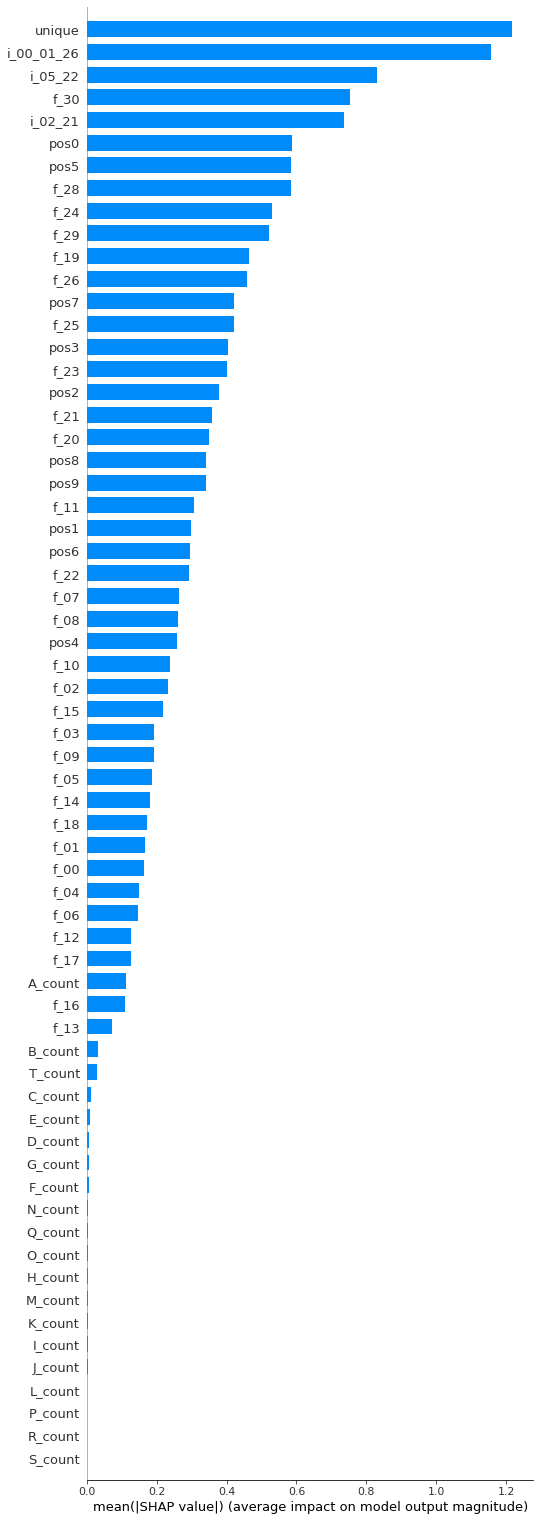

In [51]:
shap.summary_plot(shap_values, plot_type='bar',\
                 feature_names=series.drop(columns=['target','f_27']).columns,
                 max_display=100)

In [56]:
test_series = pd.read_csv('test.csv')

In [57]:
test_series

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,1599995,0.640110,0.897808,-0.523956,1.563760,-0.092281,-0.610867,0.535426,0,1,...,2.604048,1.122867,0.518110,1.243837,0.575111,0.076372,BCBCEBHMCD,204.186539,0,0
699996,1599996,-0.191771,-0.035246,-0.118533,0.584750,2.126977,0.568659,-0.052663,4,3,...,3.029857,1.384682,-1.135740,2.982713,-1.511760,2.225218,BAABCADQFC,-97.694591,0,2
699997,1599997,-0.331704,-0.328845,-1.185503,1.022128,-0.483099,-0.107146,-0.968281,1,1,...,4.021273,-1.845266,1.096011,-2.734508,-4.885955,-2.248739,AAAJCBGQBA,130.622745,1,0
699998,1599998,-2.031073,-1.238398,0.964699,-1.045950,0.906064,0.634301,-0.707474,5,1,...,1.453864,-1.696606,1.018995,1.973697,-0.353068,-3.333449,BCBBCABNDE,-364.625148,0,0


In [58]:
def prep(series):
    for c in string.ascii_uppercase[:-6]:    
        series[c+'_count'] = series['f_27'].str.count(c)
    for i in range(10):
        series['pos'+str(i)] = series['f_27'].str.get(i).apply(ord) - ord('A')
    series['unique'] = series['f_27'].apply(lambda s:len(set(s)))
    series['i_02_21'] = (series.f_21 + series.f_02 > 5.2).astype(int) - (series.f_21 + series.f_02 < -5.3).astype(int)
    series['i_05_22'] = (series.f_22 + series.f_05 > 5.1).astype(int) - (series.f_22 + series.f_05 < -5.4).astype(int)
    i_00_01_26 = series.f_00 + series.f_01 + series.f_26
    series['i_00_01_26'] = (i_00_01_26 > 5.0).astype(int) - (i_00_01_26 < -5.0).astype(int)
    series['f_28'] = series['f_28']/100

In [59]:
prep(test_series)
test_series.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,pos4,pos5,pos6,pos7,pos8,pos9,unique,i_02_21,i_05_22,i_00_01_26
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,1,0,3,11,0,2,5,0,0,1
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,1,0,4,6,2,1,6,0,0,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,0,1,1,10,4,4,5,-1,0,0
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,0,0,2,16,2,2,5,0,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,1,1,3,0,1,5,5,0,0,0


In [60]:
X = test_series.drop(columns=['id','f_27']).values
test_series['target'] = clf.predict_proba(X)[:,1]

In [61]:
test_series.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,pos5,pos6,pos7,pos8,pos9,unique,i_02_21,i_05_22,i_00_01_26,target
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,0,3,11,0,2,5,0,0,1,9.999837e-01
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,0,4,6,2,1,6,0,0,0,9.996896e-01
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,1,1,10,4,4,5,-1,0,0,8.176035e-12
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,0,2,16,2,2,5,0,0,0,1.407637e-04
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,1,3,0,1,5,5,0,0,0,9.993404e-01


In [62]:
test_series[['id','target']].to_csv('xgboost_baseline.csv',index=False)